# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from numpy import load

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite
import math


def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:z
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Y_train=np.transpose([Y_train])
    data=np.concatenate((X_train,Y_train), axis=1)
    classes,freq=np.unique(data[:,-1],return_counts=True)
    probab_dict={}
    class_data={}
    class_mean={}
    class_cov={}
    total_samples=np.sum(freq)
    answer=[]
    for i in range(len(classes)):
        probab_dict[classes[i]]=freq[i]/total_samples
        class_data[classes[i]]=data[np.where(data[:,-1]==classes[i])][...,:-1]
        class_mean[classes[i]]=np.mean(class_data[classes[i]],axis=0)
        class_cov[classes[i]]=np.linalg.inv(np.identity(np.shape(X_test)[1]))
        answer.append(probab_dict[classes[i]]*np.linalg.det(class_cov[classes[i]])**(-1)*np.exp(-0.5*np.einsum('ij,ik,jk->j', (X_test-class_mean[classes[i]]).T, class_cov[classes[i]], X_test-class_mean[classes[i]])))
        
            
    
    answer=np.array(answer).T 
    answer=np.argmax(answer, axis=1)
    answer[answer==0]=-1
    return answer
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    cov=np.cov(X_train,rowvar=False)
    Y_train=np.transpose([Y_train])
    data=np.concatenate((X_train,Y_train), axis=1)
    classes,freq=np.unique(data[:,-1],return_counts=True)
    probab_dict={}
    class_data={}
    class_mean={}
    class_cov={}
    answer=[]
    total_samples=np.sum(freq)
    for i in range(len(classes)):
        probab_dict[classes[i]]=freq[i]/total_samples
        class_data[classes[i]]=data[np.where(data[:,-1]==classes[i])][...,:-1]
        class_mean[classes[i]]=np.mean(class_data[classes[i]],axis=0)
        class_cov[classes[i]]=np.linalg.inv(cov)
        answer.append(probab_dict[classes[i]]*np.linalg.det(class_cov[classes[i]])**(-1)*np.exp(-0.5*np.einsum('ij,ik,jk->j', (X_test-class_mean[classes[i]]).T, class_cov[classes[i]], X_test-class_mean[classes[i]])))
    
    answer=np.array(answer).T 
    answer=np.argmax(answer, axis=1)
    answer[answer==0]=-1
    return answer


def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Y_train=np.transpose([Y_train])
    data=np.concatenate((X_train,Y_train), axis=1)
    classes,freq=np.unique(data[:,-1],return_counts=True)
    probab_dict={}
    class_data={}
    class_mean={}
    class_cov={}
    total_samples=np.sum(freq)
    answer=[]
    for i in range(len(classes)):
        probab_dict[classes[i]]=freq[i]/total_samples
        class_data[classes[i]]=data[np.where(data[:,-1]==classes[i])][...,:-1]
        class_mean[classes[i]]=np.mean(class_data[classes[i]],axis=0)
        class_cov[classes[i]]=np.linalg.inv(np.cov(class_data[classes[i]],rowvar=False))
        answer.append(probab_dict[classes[i]]*np.linalg.det(class_cov[classes[i]])**(-1)*np.exp(-0.5*np.einsum('ij,ik,jk->j', (X_test-class_mean[classes[i]]).T, class_cov[classes[i]], X_test-class_mean[classes[i]])))
    
    
    answer=np.array(answer).T 
    answer=np.argmax(answer, axis=1)
    answer[answer==0]=-1
    return answer
    
    




In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))


Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


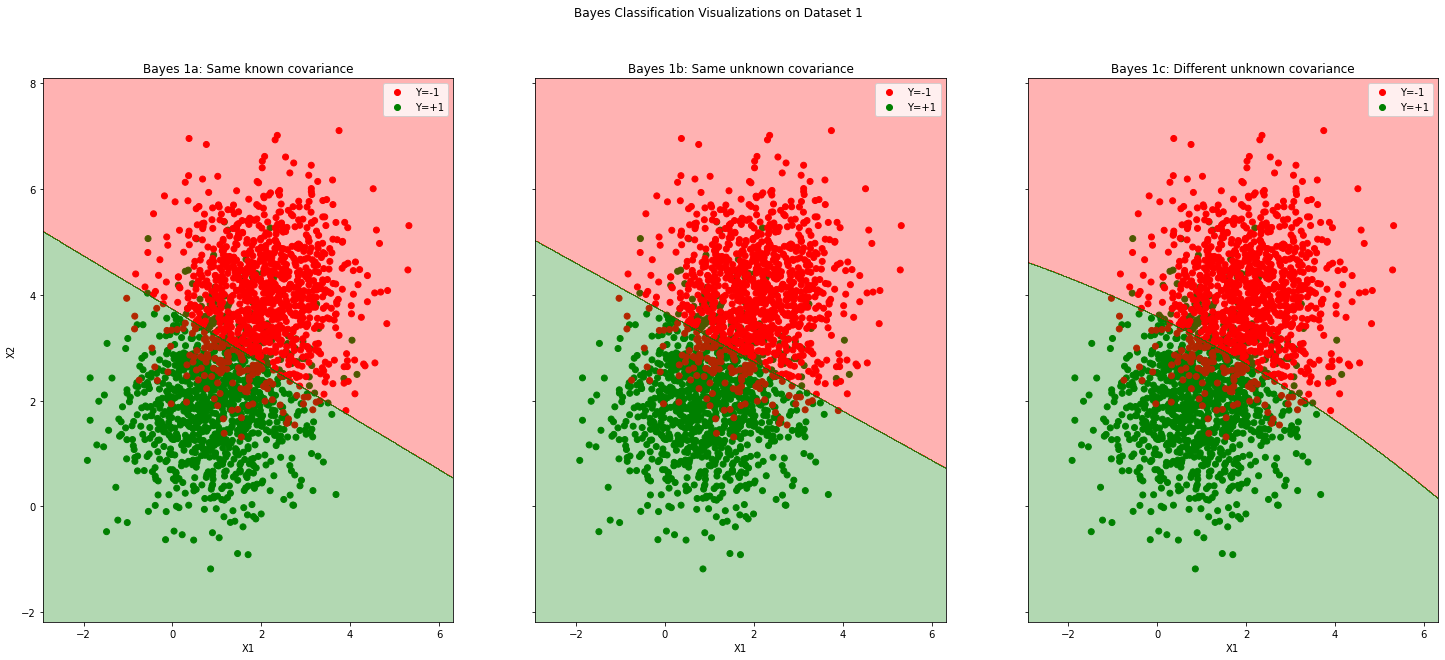

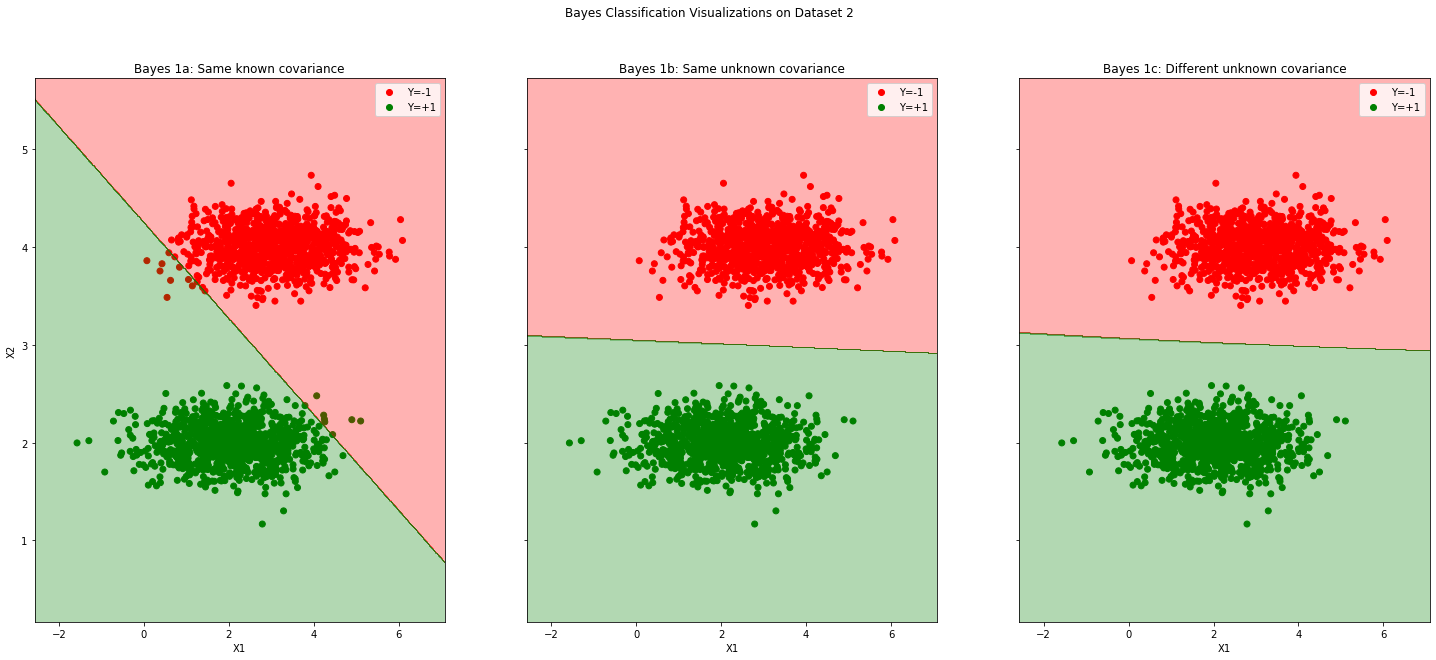

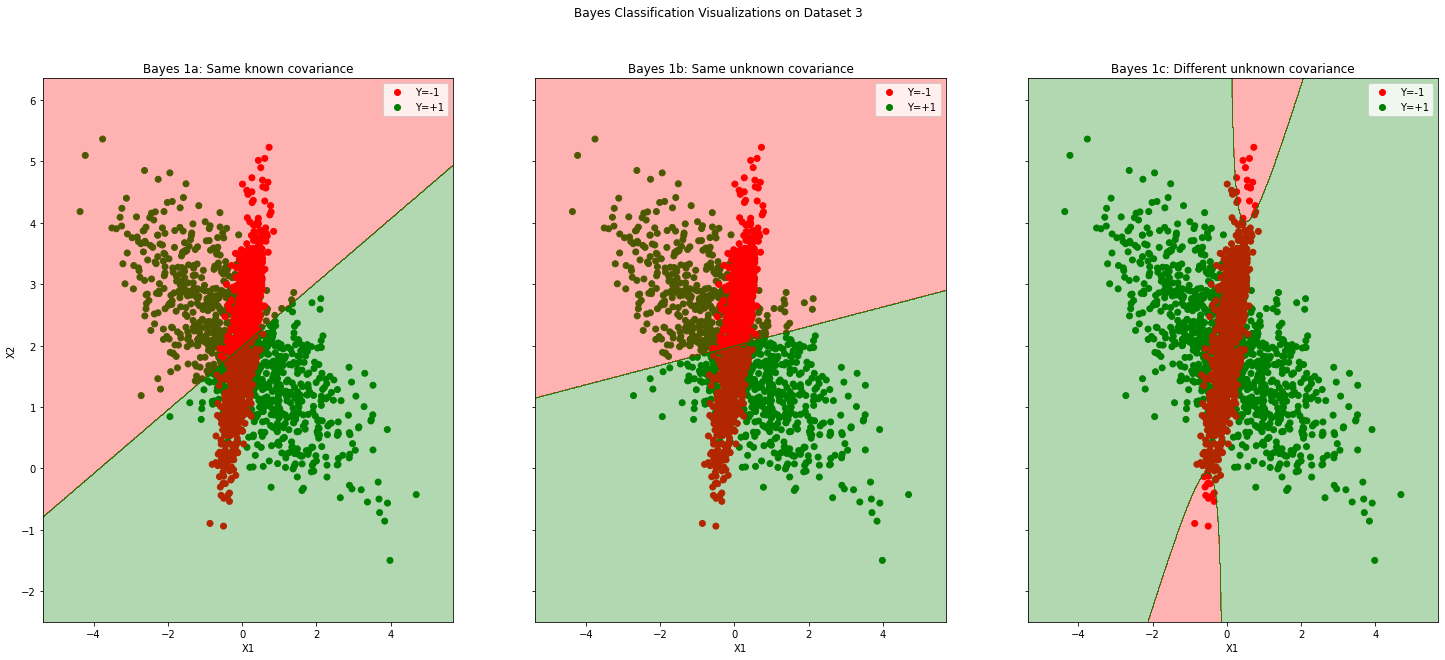

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
from numpy import load
from matplotlib.colors import ListedColormap


data1=load(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/PRML/A1/Data/dataset1_1.npz")
data2=load(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/PRML/A1/Data/dataset1_2.npz")
data3=load(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/PRML/A1/Data/dataset1_3.npz")

d1_X_train=np.array(data1[data1.files[0]])
d1_Y_train=np.array(data1[data1.files[1]])
d1_X_test=np.array(data1[data1.files[2]])
d1_Y_test=np.array(data1[data1.files[3]])
d2_X_train=np.array(data2[data2.files[0]])
d2_Y_train=np.array(data2[data2.files[1]])
d2_X_test=np.array(data2[data2.files[2]])
d2_Y_test=np.array(data2[data2.files[3]])
d3_X_train=np.array(data3[data3.files[0]])
d3_Y_train=np.array(data3[data3.files[1]])
d3_X_test=np.array(data3[data3.files[2]])
d3_Y_test=np.array(data3[data3.files[3]])


#PLOT FOR FIGURE 1
fig, axs = plt.subplots(1,3,figsize=(25, 10), sharex=True, sharey=True)
fig.suptitle('Bayes Classification Visualizations on Dataset 1')
X_set, y_set = d1_X_train, d1_Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
x_in = np.c_[X1.ravel(), X2.ravel()]
axs[0].set_xlim(X1.min(), X1.max())
axs[0].set_ylim(X2.min(), X2.max())
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

title = ["Bayes 1a: Same known covariance", "Bayes 1b: Same unknown covariance", "Bayes 1c: Different unknown covariance"]

for i in range(3):
    scatterplot=axs[i].scatter(d1_X_train[:,0],d1_X_train[:,1], c = d1_Y_train, cmap =ListedColormap(('red', 'green')));
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X1')
    axs[i].legend(handles=scatterplot.legend_elements()[0], labels=['Y=-1','Y=+1'])
    
y_pred_a=Bayes1a(d1_X_train,d1_Y_train,x_in)
y_pred_a = y_pred_a.reshape(X1.shape)
axs[0].contourf(X1, X2, y_pred_a, cmap =ListedColormap(('red', 'green')), alpha=0.3 )

y_pred_b=Bayes1b(d1_X_train,d1_Y_train,x_in)
y_pred_b =y_pred_b.reshape(X1.shape)
axs[1].contourf(X1, X2, y_pred_b, cmap =ListedColormap(('red', 'green')), alpha=0.3 )

y_pred_c=Bayes1c(d1_X_train,d1_Y_train,x_in)
y_pred_c = y_pred_c.reshape(X1.shape)
axs[2].contourf(X1, X2, y_pred_c, cmap =ListedColormap(('red', 'green')), alpha=0.3 )


# PLOT FOR DATASET 2
fig, axs = plt.subplots(1,3,figsize=(25, 10), sharex=True, sharey=True)
fig.suptitle('Bayes Classification Visualizations on Dataset 2')
X_set, y_set = d2_X_train, d2_Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
x_in = np.c_[X1.ravel(), X2.ravel()]
axs[0].set_xlim(X1.min(), X1.max())
axs[0].set_ylim(X2.min(), X2.max())
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

title = ["Bayes 1a: Same known covariance", "Bayes 1b: Same unknown covariance", "Bayes 1c: Different unknown covariance"]
for i in range(3):
    scatterplot=axs[i].scatter(d2_X_train[:,0],d2_X_train[:,1], c = d2_Y_train, cmap =ListedColormap(('red', 'green')));
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X1')
    axs[i].legend(handles=scatterplot.legend_elements()[0], labels=['Y=-1','Y=+1'])

y_pred_a = np.round(Bayes1a(d2_X_train,d2_Y_train,x_in)).reshape(X1.shape)
axs[0].contourf(X1, X2, y_pred_a, cmap =ListedColormap(('red', 'green')), alpha=0.3 )

y_pred_b = np.round(Bayes1b(d2_X_train,d2_Y_train,x_in)).reshape(X1.shape)
axs[1].contourf(X1, X2, y_pred_b, cmap =ListedColormap(('red', 'green')), alpha=0.3 )

y_pred_c = np.round(Bayes1c(d2_X_train,d2_Y_train,x_in)).reshape(X1.shape)
axs[2].contourf(X1, X2, y_pred_c, cmap =ListedColormap(('red', 'green')), alpha=0.3 )


# PLOT FOR DATASET 3
fig, axs = plt.subplots(1,3,figsize=(25, 10), sharex=True, sharey=True)
fig.suptitle('Bayes Classification Visualizations on Dataset 3')
X_set, y_set = d3_X_train, d3_Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
x_in = np.c_[X1.ravel(), X2.ravel()]
axs[0].set_xlim(X1.min(), X1.max())
axs[0].set_ylim(X2.min(), X2.max())
axs[0].set_ylabel('X2')

title = ["Bayes 1a: Same known covariance", "Bayes 1b: Same unknown covariance", "Bayes 1c: Different unknown covariance"]

for i in range(3):
    scatterplot=axs[i].scatter(d3_X_train[:,0],d3_X_train[:,1], c = d3_Y_train, cmap =ListedColormap(('red', 'green')));
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X1')
    axs[i].legend(handles=scatterplot.legend_elements()[0], labels=['Y=-1','Y=+1'])

y_pred_a = Bayes1a(d3_X_train,d3_Y_train,x_in).reshape(X1.shape)

axs[0].contourf(X1, X2, y_pred_a, cmap =ListedColormap(('red', 'green')), alpha=0.3 )

y_pred_b = Bayes1b(d3_X_train,d3_Y_train,x_in).reshape(X1.shape)
axs[1].contourf(X1, X2, y_pred_b, cmap =ListedColormap(('red', 'green')), alpha=0.3 )

y_pred_c = Bayes1c(d3_X_train,d3_Y_train,x_in).reshape(X1.shape)
axs[2].contourf(X1, X2, y_pred_c, cmap =ListedColormap(('red', 'green')), alpha=0.3 )


data1.close()
data2.close()
data3.close()


Cell type : TextWrite
(Write your observations and table of errors here)

### <center><font color='red'> Summary </font>  </center> 
<center> The function in the first two functions is linear since they have the same covariance matrix and hence the quadratic terms do not affect the classifications. The third classifier has difference covariance matrices for the two likelihoods and hence the quadratic terms play a role in the classification. Hence, as seen in the plot, the decision boundary in the third diagram is slightly curved. The three plots show comparable results when implemented on the first data set, with the third plot being slightly better. In the second data set, Bayes 1b and Bayes 1c give perfect results since they have the covariance matrix according to the data and hence can fit the line better. The data is linearly separable and hence, both 1b and 1c give perfect results. In the third data set there is a clear distinction in the results and accuracy of Bayes 1c, when compared to the other two functions. This is because the third classifier accounts for the difference in the covariance matrix for the two likelihoods, and hence the third classifier can classify better. </center>

### <center><font color='red'> Error Table </font>  </center>

#### <center><font color='green'> Error Formula= (number of data points that are misclassified)/(total number of points) </font>  </center> 

| Dataset No.| Bayes 1a Error | Bayes 1b Error | Bayes 1c Error |
| --- | --- | --- | --- |
| Dataset 1 | 0.126 | 0.1245 | 0.1245 |
| Dataset 2 | 0.0085 | 0.0 | 0.0 |
| Dataset 3 | 0.497 | 0.495 | 0.135 |



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    Y_train=np.transpose([Y_train])
    data=np.concatenate((X_train,Y_train), axis=1)
    classes,freq=np.unique(data[:,-1],return_counts=True)
    probab_dict={}
    class_data={}
    class_mean={}
    class_cov={}
    total_samples=np.sum(freq)
    answer=[]
    for i in range(len(classes)):
        probab_dict[classes[i]]=freq[i]/total_samples
        class_data[classes[i]]=data[np.where(data[:,-1]==classes[i])][...,:-1]
        class_mean[classes[i]]=np.mean(class_data[classes[i]],axis=0)
        class_cov[classes[i]]=np.linalg.inv(np.identity(np.shape(X_test)[1]))
        answer.append(probab_dict[classes[i]]*np.linalg.det(class_cov[classes[i]])**(-1)*np.exp(-0.5*np.einsum('ij,ik,jk->j', (X_test-class_mean[classes[i]]).T, class_cov[classes[i]], X_test-class_mean[classes[i]])))

                                     
    
    L_matrix=np.array([[0,1,2,3], [1,0,1,2], [2,1,0,1], [3,2,1,0]])
    answer=np.matmul(np.transpose(answer),L_matrix)
    answer=np.array(answer)
    #print(answer)
    answer=np.argmin(answer, axis=1)+1   
    #print(answer)
    return answer
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    cov=np.cov(X_train,rowvar=False)
    Y_train=np.transpose([Y_train])
    data=np.concatenate((X_train,Y_train), axis=1)
    classes,freq=np.unique(data[:,-1],return_counts=True)
    probab_dict={}
    class_data={}
    class_mean={}
    class_cov={}
    total_samples=np.sum(freq)
    answer=[]
    for i in range(len(classes)):
        probab_dict[classes[i]]=freq[i]/total_samples
        class_data[classes[i]]=data[np.where(data[:,-1]==classes[i])][...,:-1]
        class_mean[classes[i]]=np.mean(class_data[classes[i]],axis=0)
        class_cov[classes[i]]=np.linalg.inv(cov)
        answer.append(probab_dict[classes[i]]*np.linalg.det(class_cov[classes[i]])**(-1)*np.exp(-0.5*np.einsum('ij,ik,jk->j', (X_test-class_mean[classes[i]]).T, class_cov[classes[i]], X_test-class_mean[classes[i]])))

    
    L_matrix=np.array([[0,1,2,3], [1,0,1,2], [2,1,0,1], [3,2,1,0]])
    answer=np.matmul(np.transpose(answer),L_matrix)
    answer=np.array(answer)
    #print(answer)
    answer=np.argmin(answer, axis=1)+1  
    return answer

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    Y_train=np.transpose([Y_train])
    data=np.concatenate((X_train,Y_train), axis=1)
    classes,freq=np.unique(data[:,-1],return_counts=True)
    probab_dict={}
    class_data={}
    class_mean={}
    class_cov={}
    total_samples=np.sum(freq)
    answer=[]
    for i in range(len(classes)):
        probab_dict[classes[i]]=freq[i]/total_samples
        class_data[classes[i]]=data[np.where(data[:,-1]==classes[i])][...,:-1]
        class_mean[classes[i]]=np.mean(class_data[classes[i]],axis=0)
        class_cov[classes[i]]=np.linalg.inv(np.cov(class_data[classes[i]],rowvar=False))
        answer.append(probab_dict[classes[i]]*np.linalg.det(class_cov[classes[i]])**(-1)*np.exp(-0.5*np.einsum('ij,ik,jk->j', (X_test-class_mean[classes[i]]).T, class_cov[classes[i]], X_test-class_mean[classes[i]])))

    
    L_matrix=np.array([[0,1,2,3], [1,0,1,2], [2,1,0,1], [3,2,1,0]])
    answer=np.matmul(np.transpose(answer),L_matrix)
    answer=np.array(answer)
    #print(answer)
    answer=np.argmin(answer, axis=1)+1
    return answer
    

    
    


    


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])


X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

#answer=np.array(np.subtract(Y_pred_test_2a,Y_test))
#b,c=np.unique(answer, return_counts=True)
#print(b)
#print(c)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


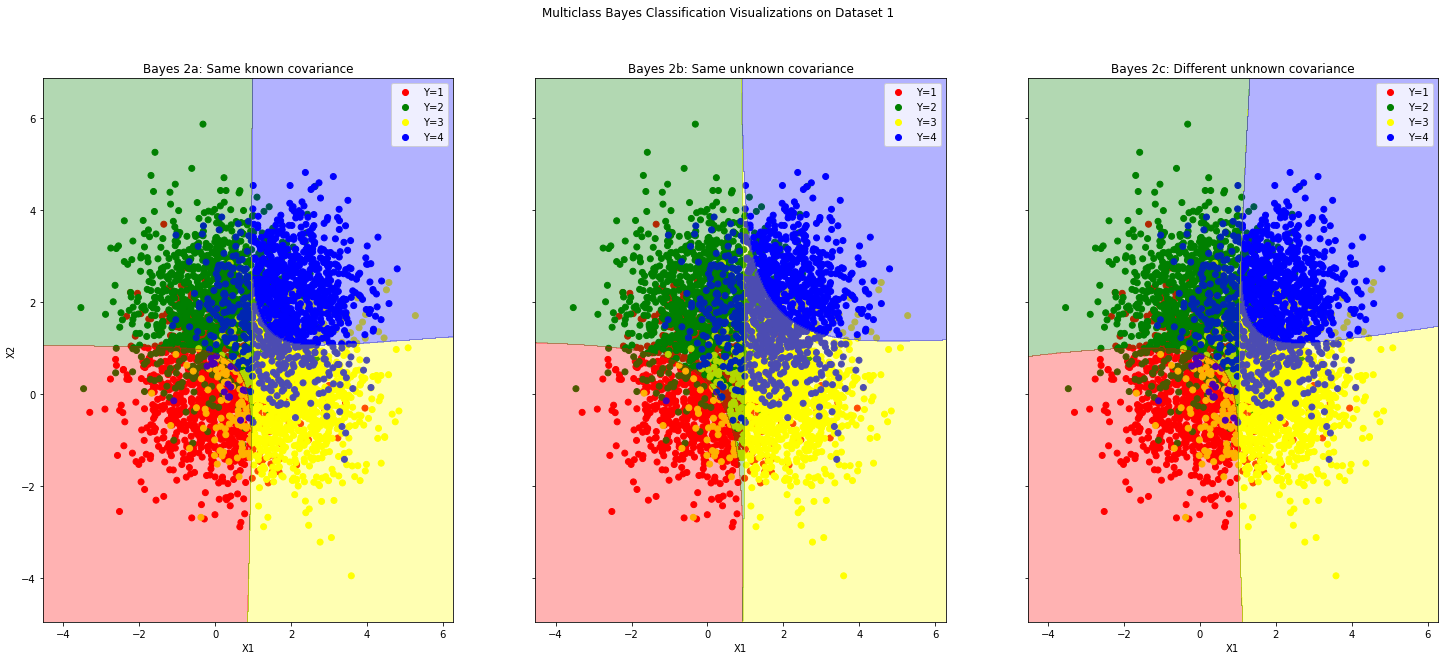

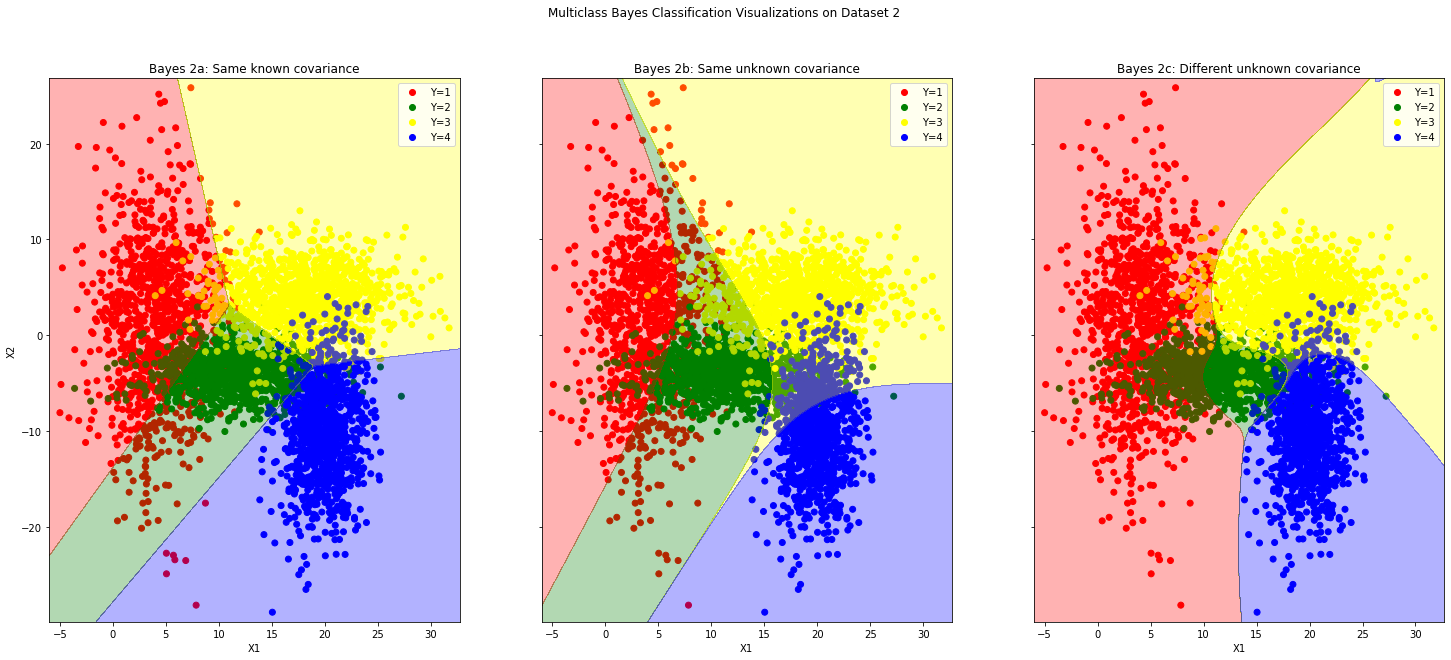

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
from numpy import load
from matplotlib.colors import ListedColormap


data1=load(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/PRML/A1/Data/dataset2_1.npz")
data2=load(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/PRML/A1/Data/dataset2_2.npz")

d1_X_train=np.array(data1[data1.files[0]])
d1_Y_train=np.array(data1[data1.files[1]])
d1_X_test=np.array(data1[data1.files[2]])
d1_Y_test=np.array(data1[data1.files[3]])
d2_X_train=np.array(data2[data2.files[0]])
d2_Y_train=np.array(data2[data2.files[1]])
d2_X_test=np.array(data2[data2.files[2]])
d2_Y_test=np.array(data2[data2.files[3]])


#PLOT FOR DATASET 1
fig, axs = plt.subplots(1,3,figsize=(25, 10), sharex=True, sharey=True)
fig.suptitle('Multiclass Bayes Classification Visualizations on Dataset 1')
X_set, y_set = d1_X_train, d1_Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
x_in = np.c_[X1.ravel(), X2.ravel()]
axs[0].set_xlim(X1.min(), X1.max())
axs[0].set_ylim(X2.min(), X2.max())
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

title = ["Bayes 2a: Same known covariance", "Bayes 2b: Same unknown covariance", "Bayes 2c: Different unknown covariance"]

for i in range(3):
    scatterplot=axs[i].scatter(d1_X_train[:,0],d1_X_train[:,1], c = d1_Y_train, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')))
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X1')
    axs[i].legend(handles=scatterplot.legend_elements()[0], labels=['Y=1','Y=2','Y=3','Y=4'])

y_pred_a = np.round(Bayes2a(d1_X_train,d1_Y_train,x_in)).reshape(X1.shape)
axs[0].contourf(X1, X2, y_pred_a, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')), alpha=0.3 )

y_pred_b = np.round(Bayes2b(d1_X_train,d1_Y_train,x_in)).reshape(X1.shape)
axs[1].contourf(X1, X2, y_pred_b, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')), alpha=0.3 )

y_pred_c = np.round(Bayes2c(d1_X_train,d1_Y_train,x_in)).reshape(X1.shape)
axs[2].contourf(X1, X2, y_pred_c, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')), alpha=0.3 )


# PLOT FOR DATASET 2
fig, axs = plt.subplots(1,3,figsize=(25, 10), sharex=True, sharey=True)
fig.suptitle('Multiclass Bayes Classification Visualizations on Dataset 2')
X_set, y_set = d2_X_train, d2_Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
x_in = np.c_[X1.ravel(), X2.ravel()]
axs[0].set_xlim(X1.min(), X1.max())
axs[0].set_ylim(X2.min(), X2.max())
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

title = ["Bayes 2a: Same known covariance", "Bayes 2b: Same unknown covariance", "Bayes 2c: Different unknown covariance"]

for i in range(3):
    axs[i].scatter(d2_X_train[:,0],d2_X_train[:,1], c = d2_Y_train, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')))
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X1')
    axs[i].legend(handles=scatterplot.legend_elements()[0], labels=['Y=1','Y=2','Y=3','Y=4'])

y_pred_a = np.round(Bayes2a(d2_X_train,d2_Y_train,x_in)).reshape(X1.shape)
axs[0].contourf(X1, X2, y_pred_a, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')), alpha=0.3)

y_pred_b = np.round(Bayes2b(d2_X_train,d2_Y_train,x_in)).reshape(X1.shape)
axs[1].contourf(X1, X2, y_pred_b, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')), alpha=0.3)

y_pred_c = np.round(Bayes2c(d2_X_train,d2_Y_train,x_in)).reshape(X1.shape)
axs[2].contourf(X1, X2, y_pred_c, cmap =ListedColormap(('red', 'green', 'yellow', 'blue')), alpha=0.3)

                   
data1.close()
data2.close()

Cell type : TextWrite
(Write your observations and table of errors here)
### <center> <font color='red'> SUMMARY </font> </center>

<center> Similar to the binary classification above, the third classifier i.e. Bayes 2c has the highest accuracy amongst the three classifiers, because it accounts for the different covarances in the four different classes. On dataset 1, since the data is more linearly separable than the second dataset, we get similar plots and accuracies for the three classifiers. Bayes 2c is still the best classifier, by a small margin. For the second data set, Bayes 2a has a lower loss than Bayes 2b. The reason could be that, the entire data has high covariance but specific data for the specific classes have lower variance. We account for higher covariance for all the classes in Bayes 2b than in Bayes 2a and therefore, Bayes 2a is a better performing model. Bayes 2c works the best, since it accounts for the variation in sepecific data for the four classes, giving better classification. </center>

### <center><font color='red'> Expected Loss Table </font>  </center>
####  <center><font color='green'> Error Formula= (loss per missclassified point)/(total number of points) </font>  </center>

| Dataset No.| Bayes 2a Loss | Bayes 2b Loss | Bayes 2c Loss |
| --- | --- | --- | --- |
| Dataset 1 | 0.42975 | 0.4290 | 0.42925 |
| Dataset 2 | 0.1835 | 0.1895 | 0.15025 |


### <center> <font color='red'> Confusion Matrices </font> </center>

####  <center> Dataset 1 </center>

<table>
<tr><th> <center> Bayes 2a </center> </th><th> <center> Bayes 2b </center> </th><th> <center> Bayes 2c </center> </th></tr>
<tr><td> 
                                                                                                           
| Actual\Predicted | Y=1| Y=2 | Y=3 | Y=4 |
| --- | --- | --- | --- | ---|
| Y=1 | 633 | 219 | 136 | 12 |
| Y=2 | 97 | 738 | 62 | 103 |
| Y=3 | 86 | 49 | 770 | 95 |
| Y=4 | 15 | 136 | 194 | 655 |

</td><td>

| Actual\Predicted | Y=1| Y=2 | Y=3 | Y=4 |
| --- | --- | --- | --- | ---|
| Y=1 | 463 | 388 | 145 | 4 |
| Y=2 | 43 | 791 | 113 | 53 |
| Y=3 | 40 | 95 | 818 | 47 |
| Y=4 | 4 | 149 | 346 | 501 |

</td><td>
    
| Actual\Predicted | Y=1| Y=2 | Y=3 | Y=4 |
| --- | --- | --- | --- | ---|
| Y=1 | 644 | 219 | 127 | 10 |
| Y=2 | 97 | 763 | 51 | 89 |
| Y=3 | 93 | 53 | 765 | 89 |
| Y=4 | 16 | 155 | 200 | 629 |

</td></tr> </table>

####  <center> Dataset 2 </center> 

<table>
<tr><th> <center> Bayes 2a </center> </th><th> <center> Bayes 2b </center> </th><th> <center> Bayes 2c </center> </th></tr>
<tr><td>
    
| Actual\Predicted | Y=1| Y=2 | Y=3 | Y=4 |
| --- | --- | --- | --- | ---|
| Y=1 | 830 | 150 | 18 | 2 |
| Y=2 | 93 | 784 | 46 | 77 |
| Y=3 | 30 | 61 | 905 | 4 |
| Y=4 | 0 | 23 | 78 | 899 |

</td><td>
    
| Actual\Predicted | Y=1| Y=2 | Y=3 | Y=4 |
| --- | --- | --- | --- | ---|
| Y=1 | 675 | 302 | 23 | 0 |
| Y=2 | 39 | 749 | 205 | 7 |
| Y=3 | 7 | 118 | 875 | 0 |
| Y=4 | 0 | 3 | 297 | 700 |

</td><td>
    
| Actual\Predicted | Y=1| Y=2 | Y=3 | Y=4 |
| --- | --- | --- | --- | ---|
| Y=1 | 992 | 3 | 5 | 0 |
| Y=2 | 314 | 542 | 72 | 73 |
| Y=3 | 43 | 16 | 936 | 5 |
| Y=4 | 1 | 22 | 70 | 907 |

</td></tr> </table>

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.


Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




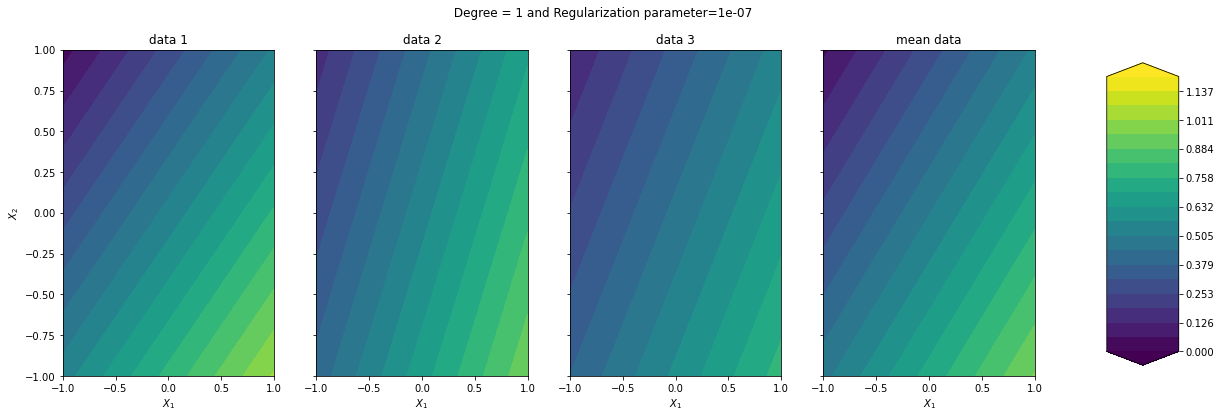

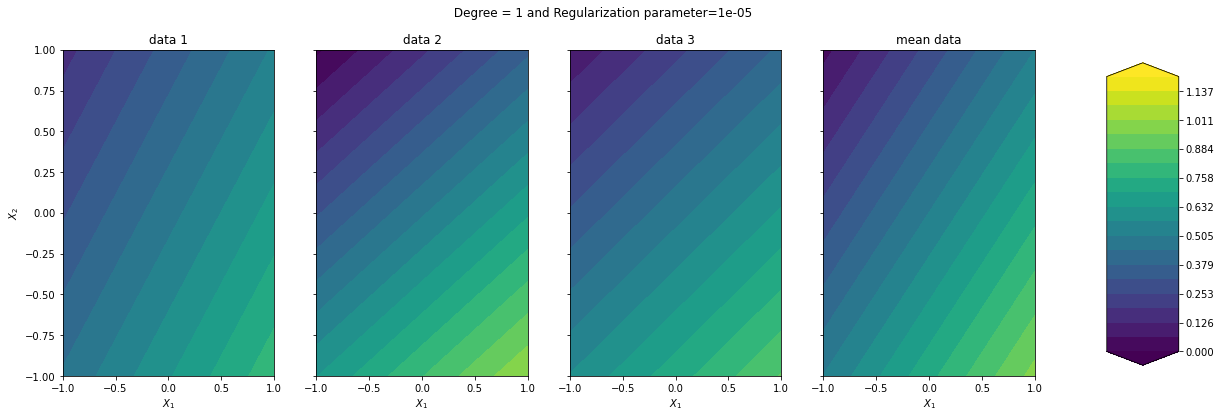

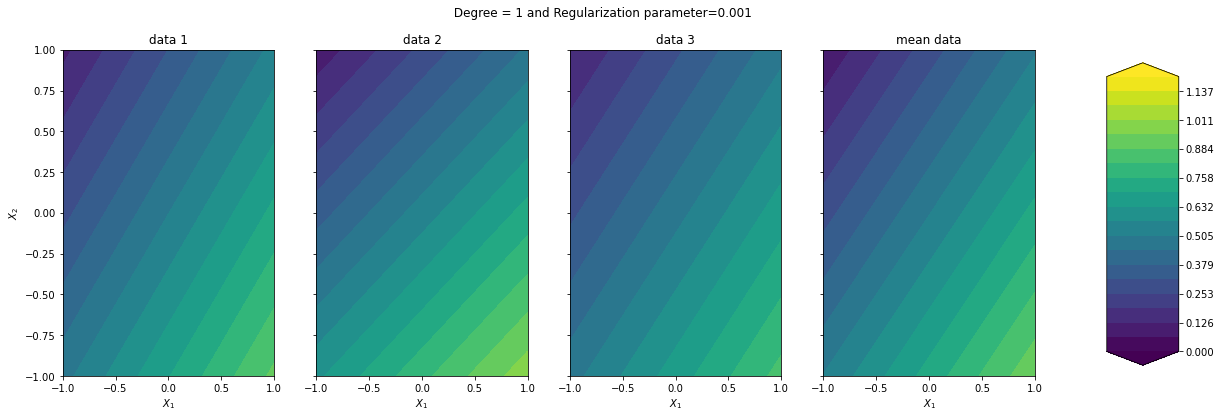

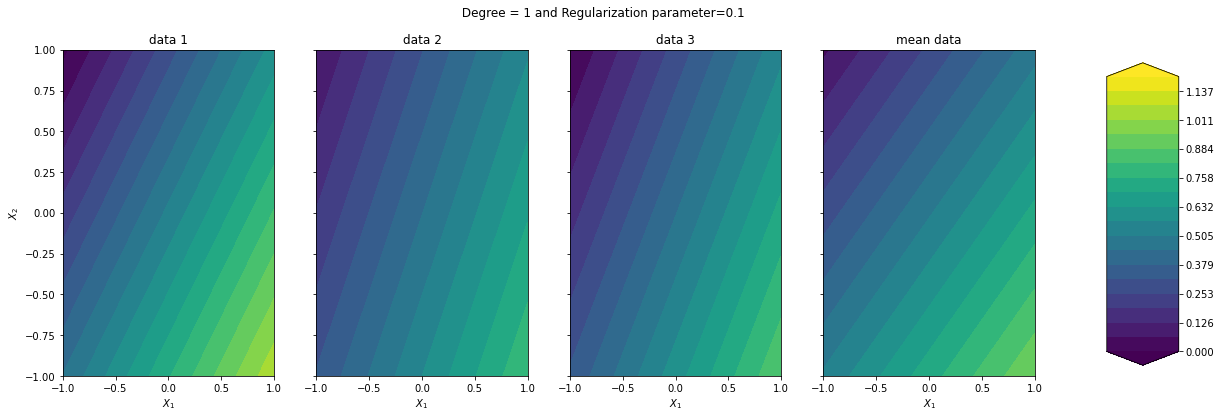

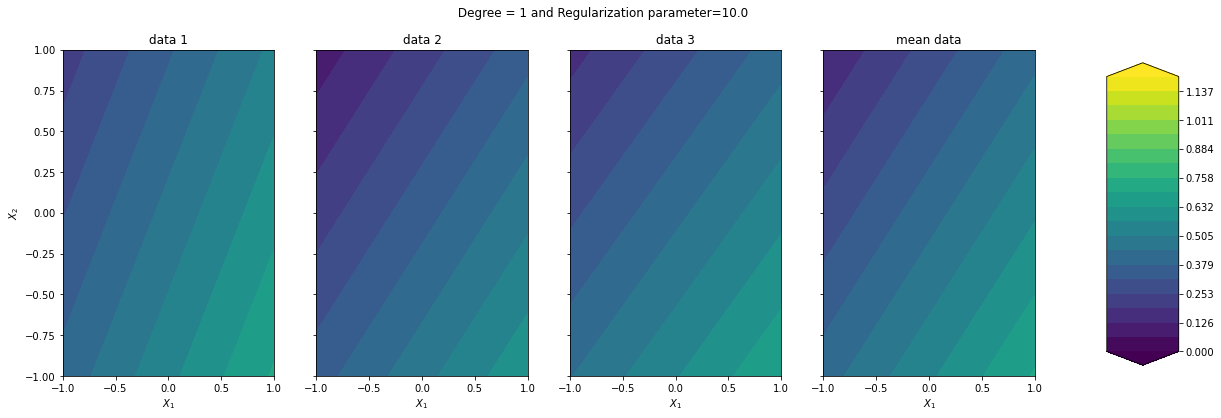

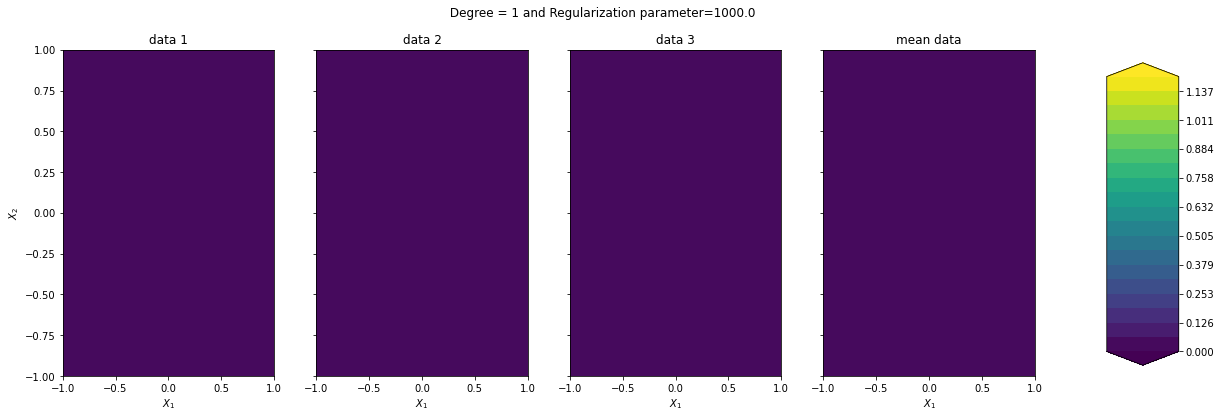

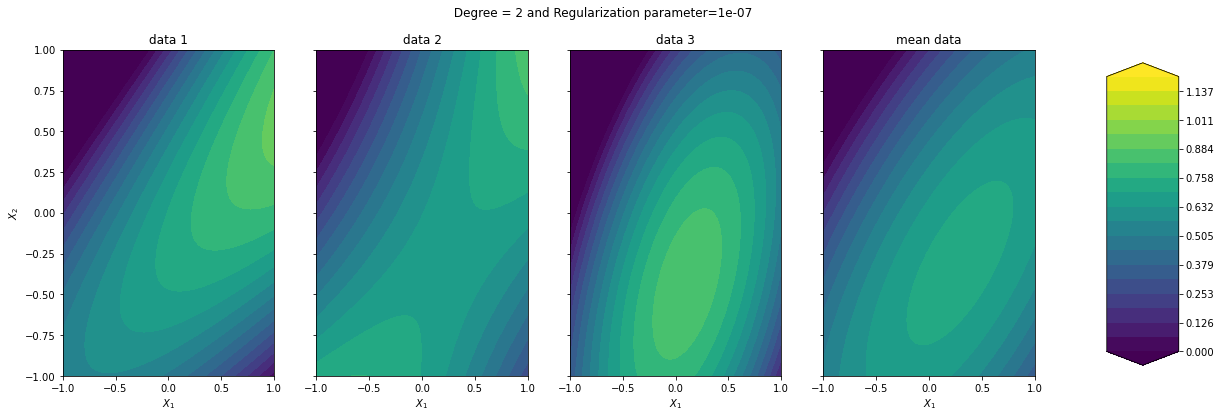

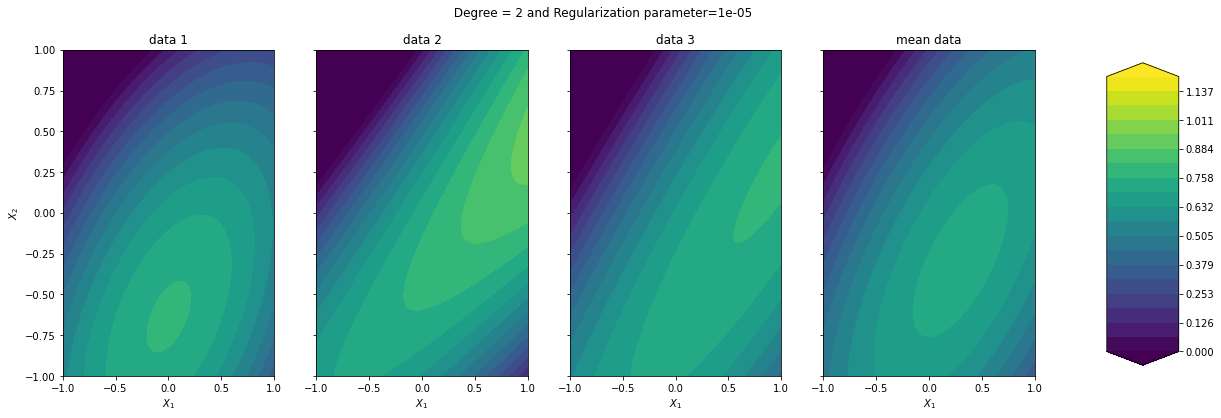

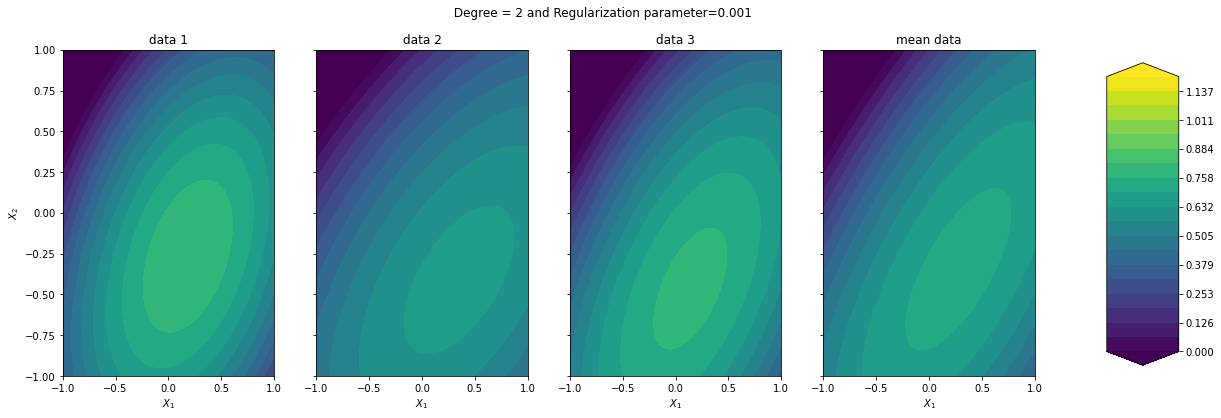

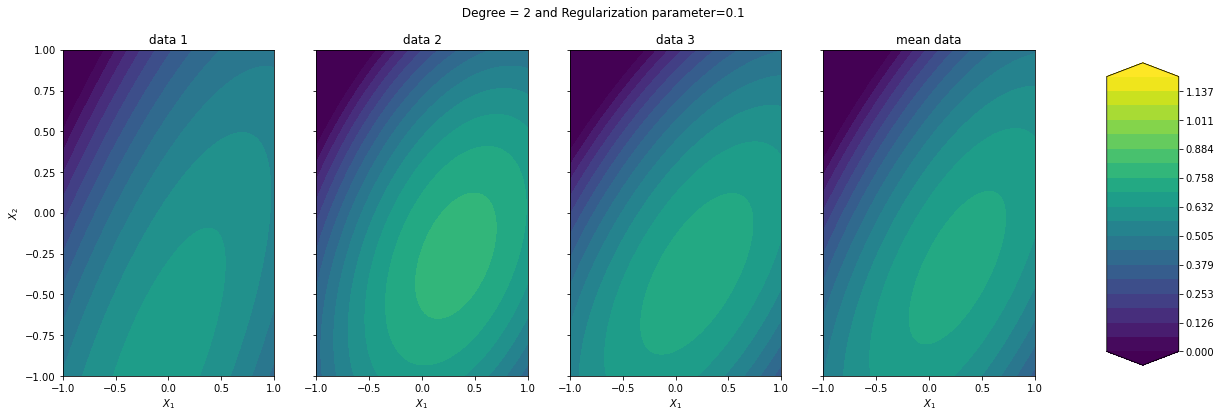

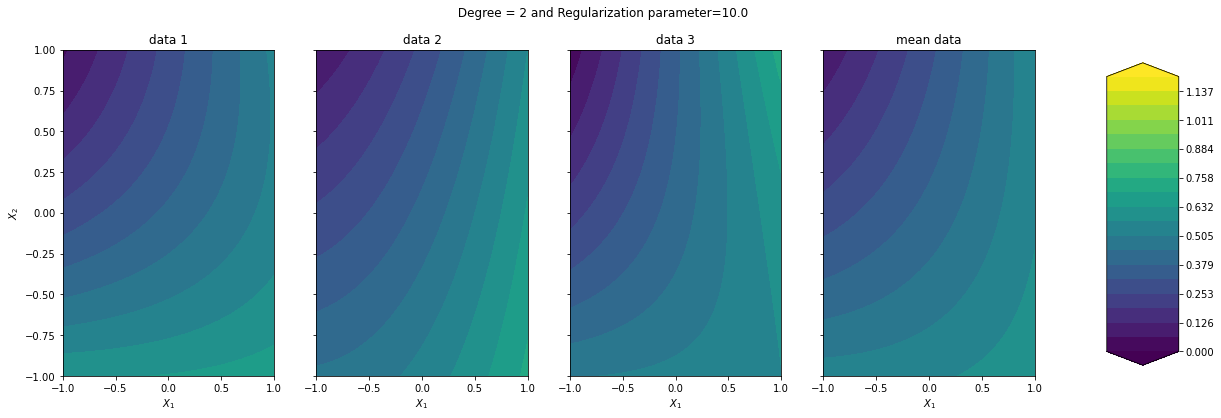

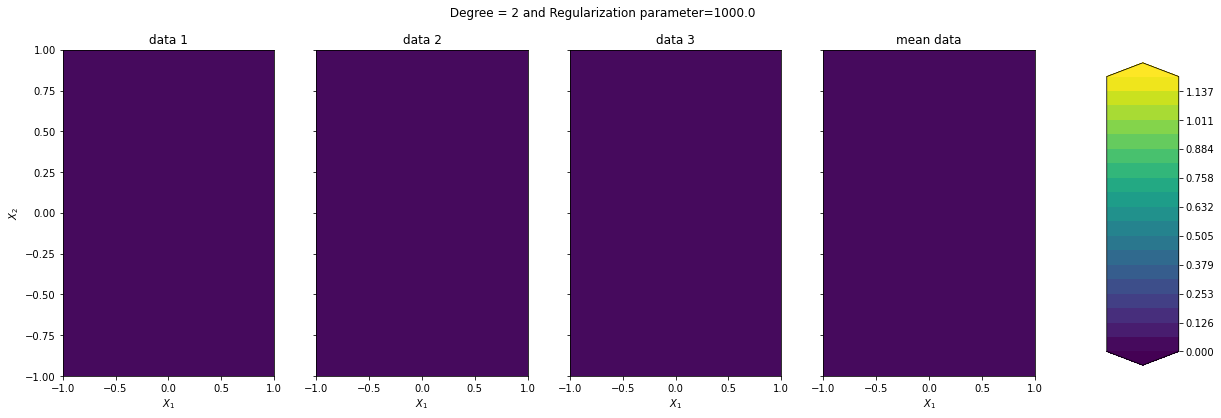

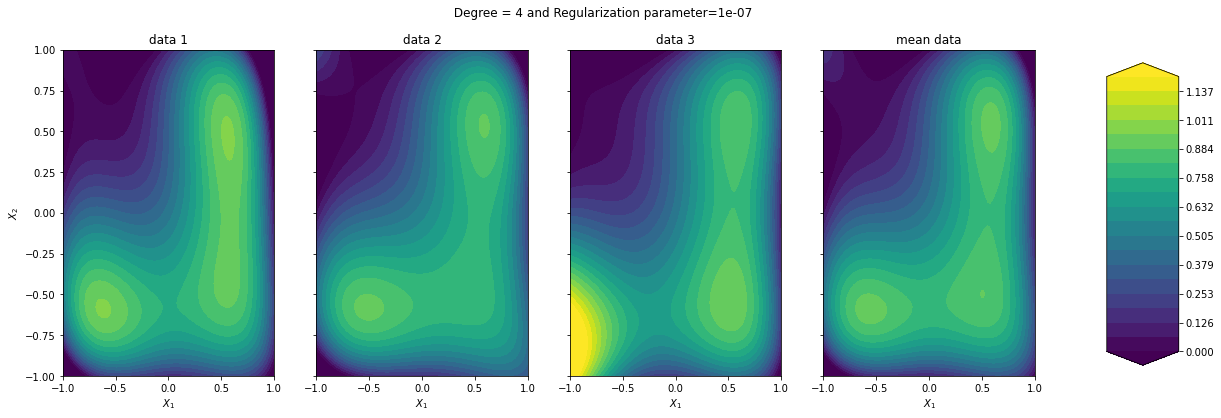

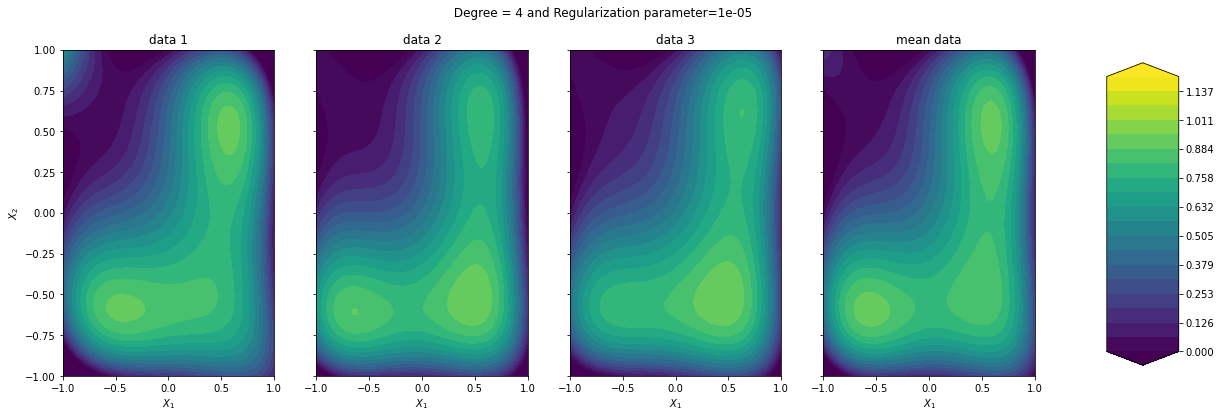

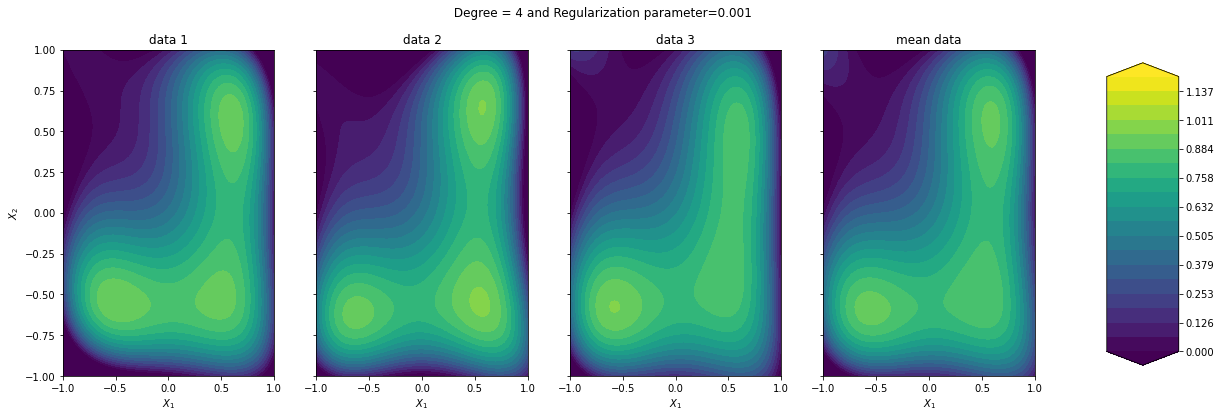

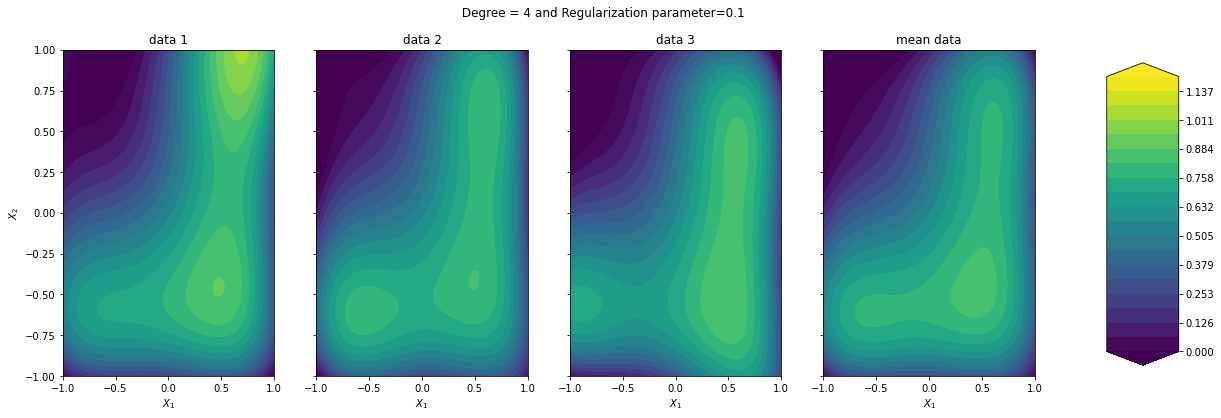

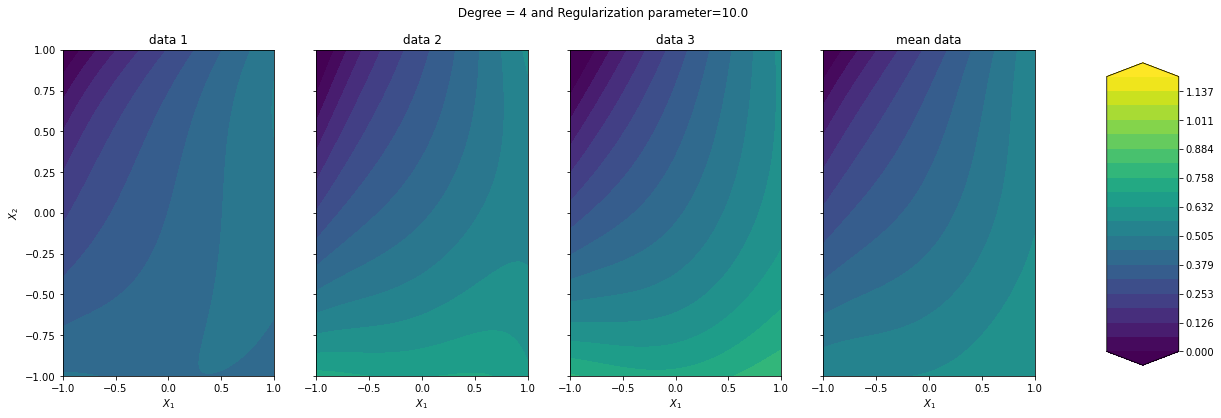

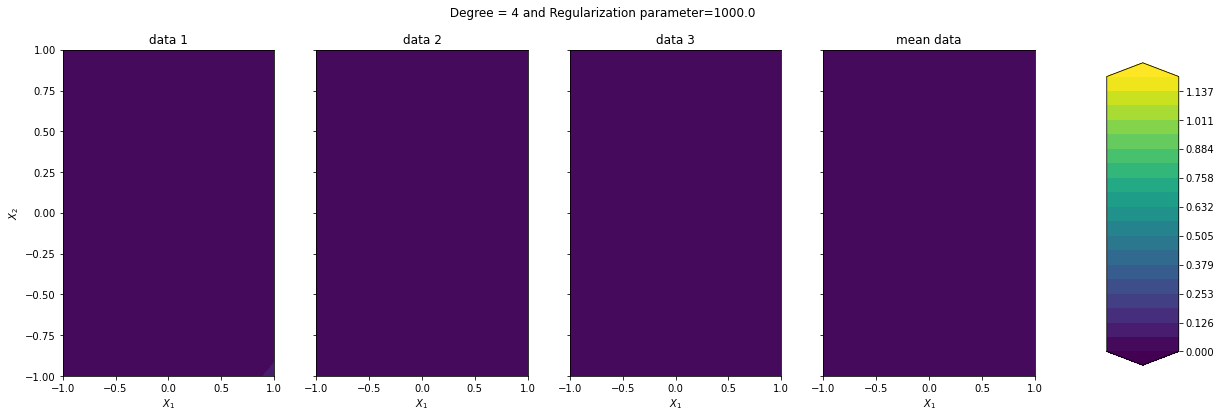

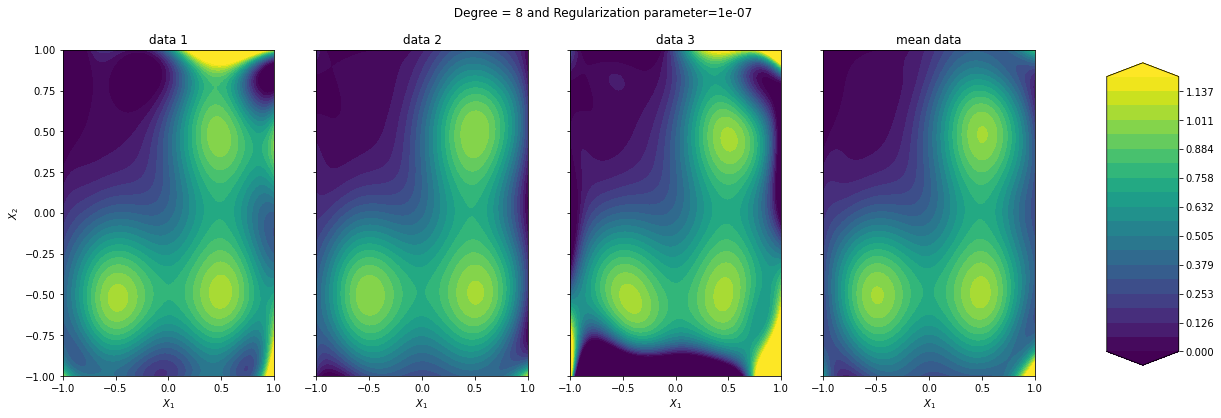

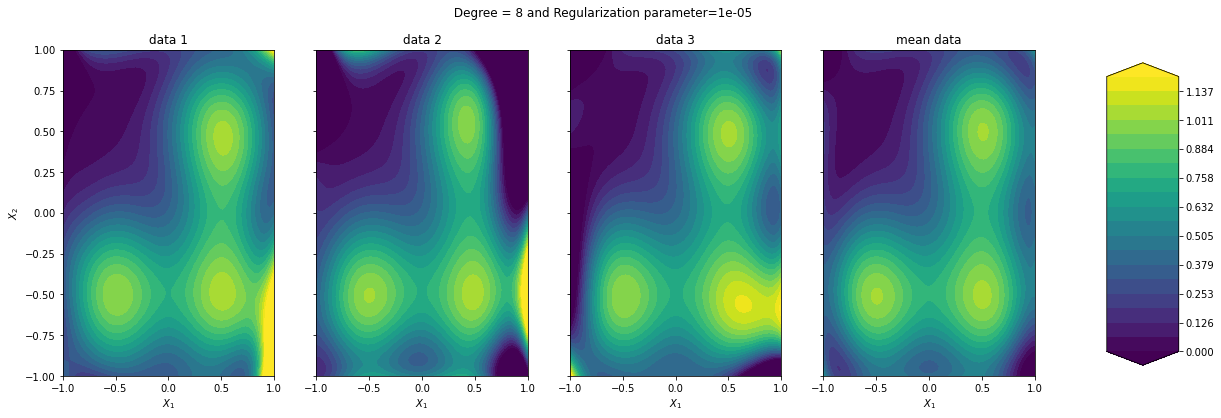

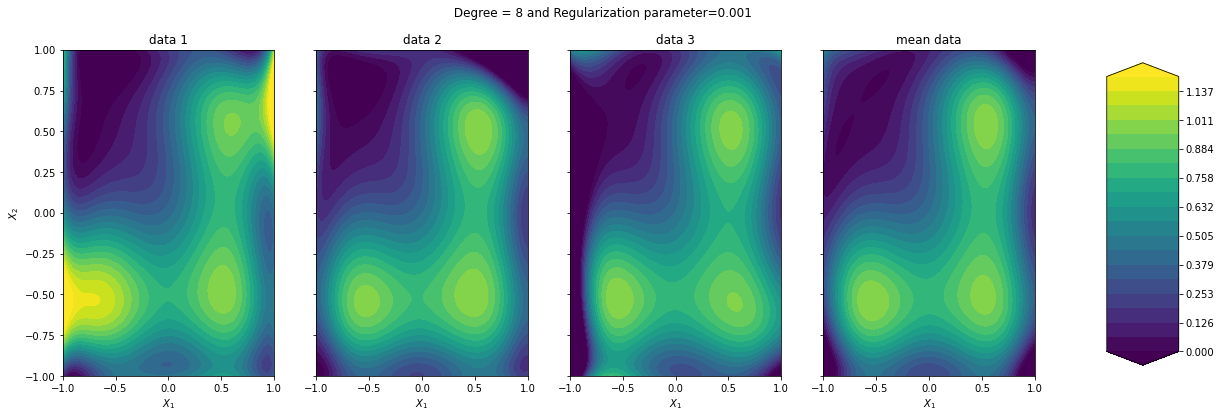

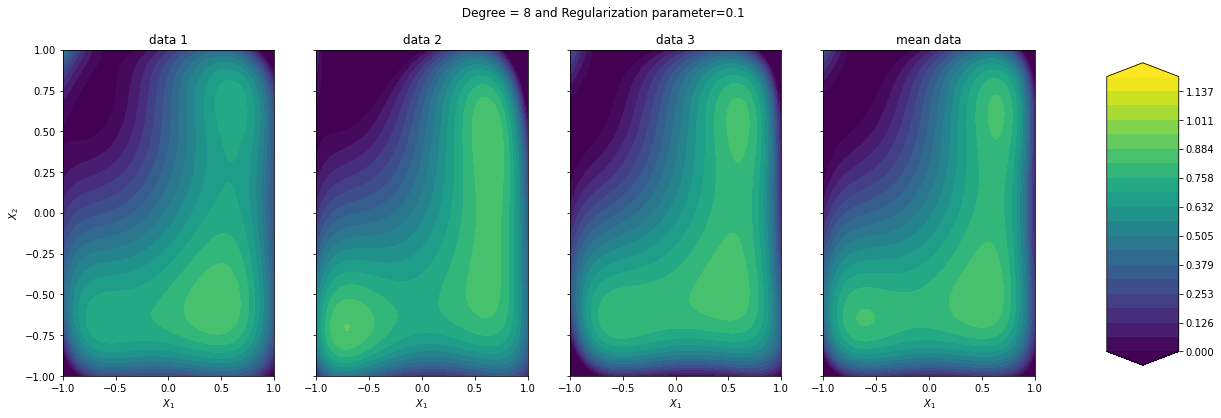

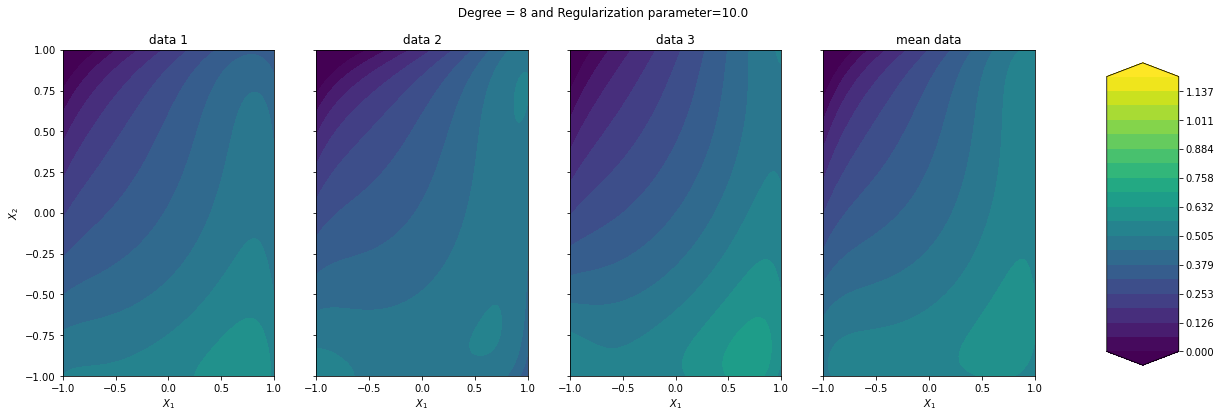

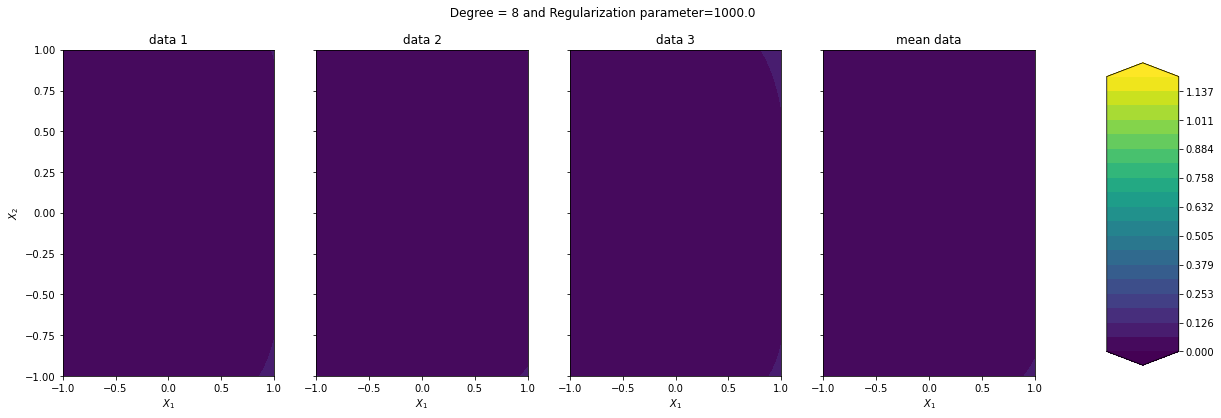

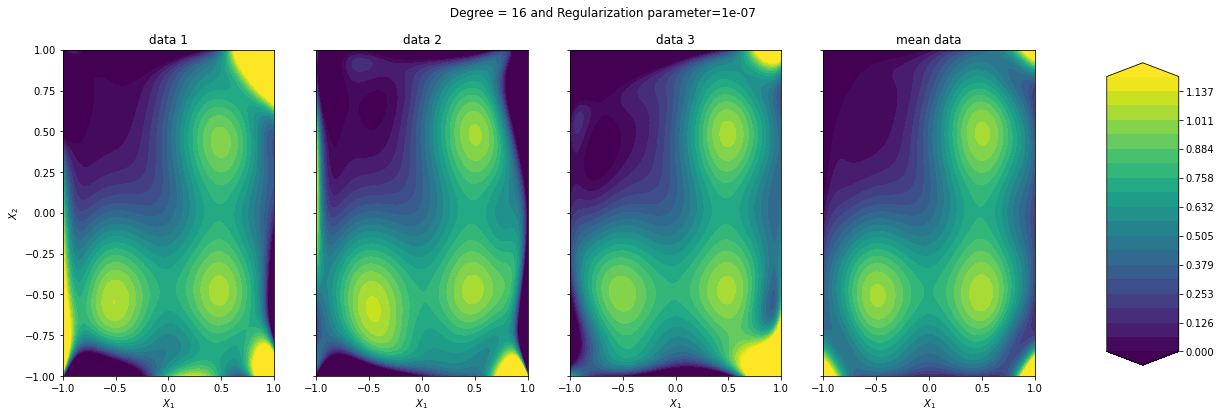

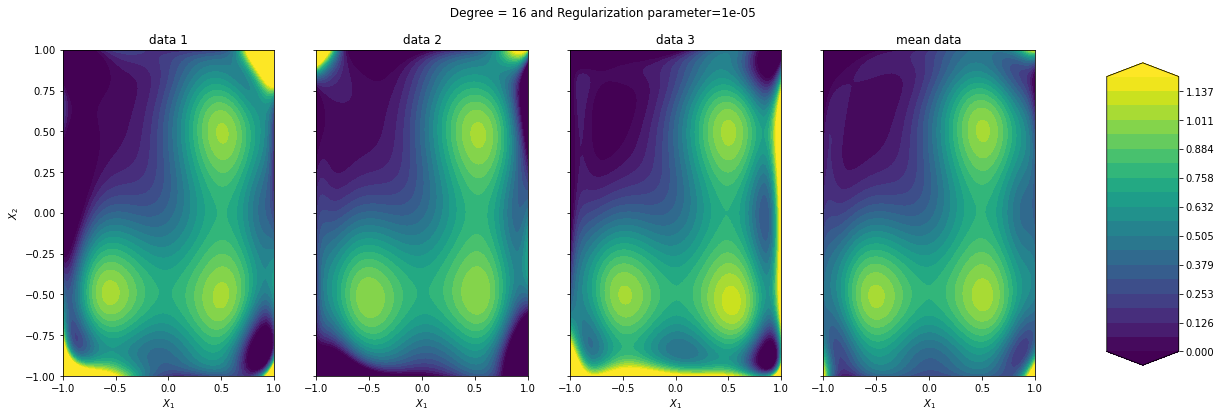

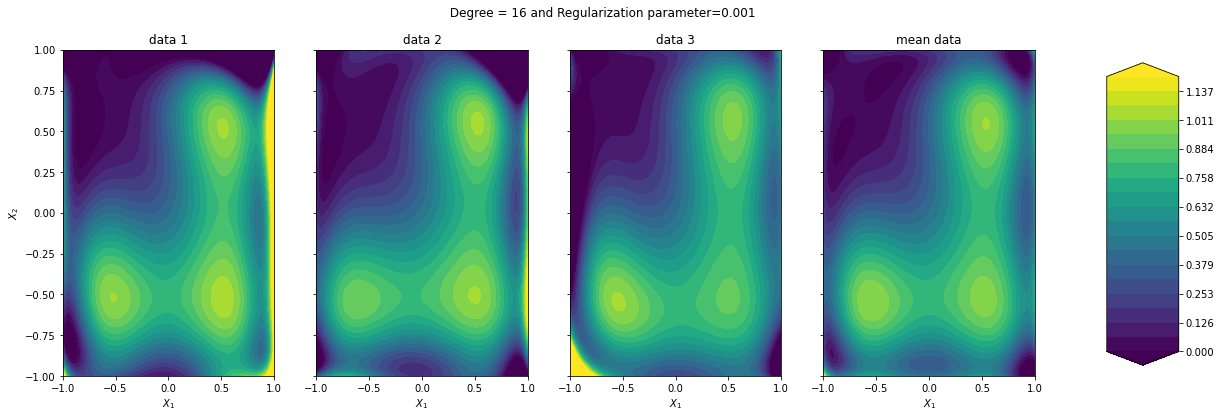

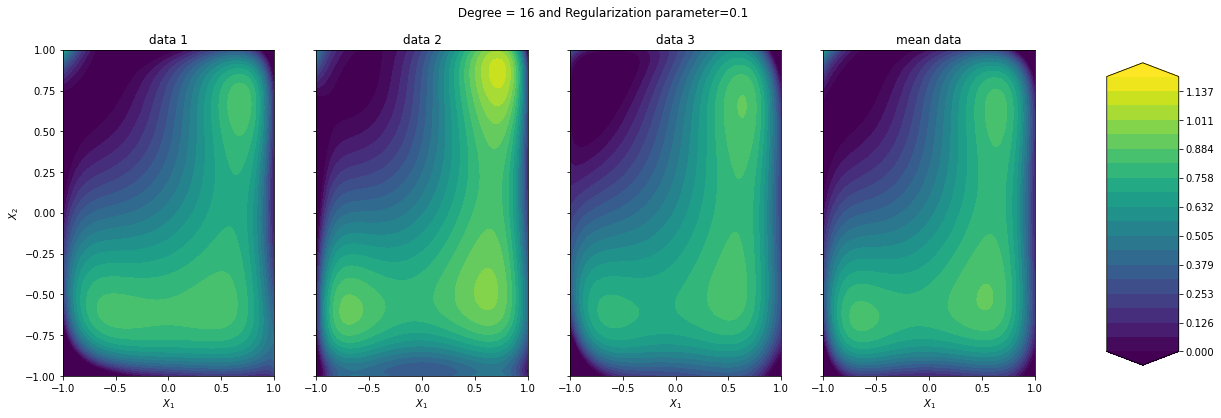

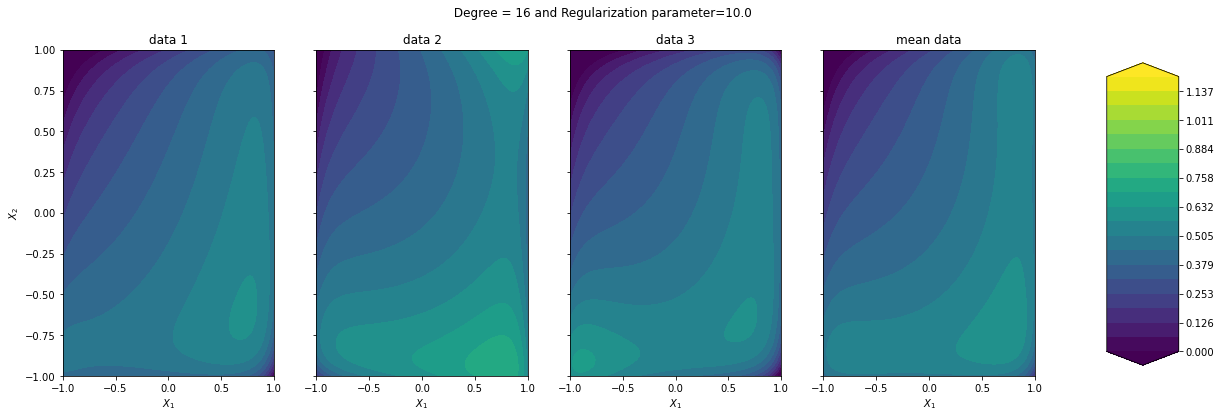

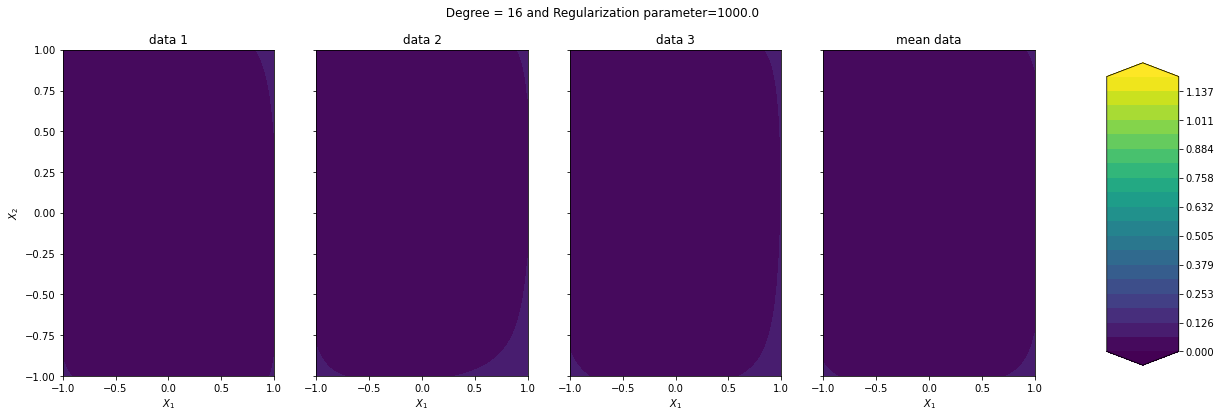

In [8]:
%matplotlib inline
# Cell type : CodeWrite
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    
    phi_test=phi(X_test,degree)
    return np.matmul(phi_test,wt_vector).T
    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    fig, axs = plt.subplots(ncols=4,nrows=1, figsize = (20,6), sharey= True);
    fig.suptitle(title);
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    #print(X)
    #print(Y)
    x_in = np.c_[X.ravel(), Y.ravel()]
    axs[0].set_ylabel('$X_2$')
    for i,wt in enumerate(wt_vector):
        y_pred=polynomial_regression_ridge_pred(x_in, wt, degree)
        Z = y_pred.reshape(X.shape)
    #     Get Z using other functions
        #print(Z)
        cont_plot = axs[i].contourf(X,Y,Z,levels=np.linspace(0,1.2, 20), extend='both');
        if(i<=2):
            axs[i].set_title(f"data {i+1}")
        
        else:
            axs[i].set_title(f"mean data");
        axs[i].set_xlabel('$X_1$')

    fig.subplots_adjust(right=0.8);
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7]);
    fig.colorbar(cont_plot, cax = cbar_ax);
    plt.show()

def phi(x, degree):
    x1, x2 = x[:,0], x[:,1]
    a=[]
    for i in range(degree +1):
        for j in range(degree-i+1):
            a.append(np.multiply((x1**i),(x2**j)))
    
    return np.array(a).T


def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi_train=phi(X_train,degree)
    #print(phi_train)
    K=np.array([np.dot(phi_train[i],phi_train[j]) for i in range(len(phi_train)) for j in range(len(phi_train)) ]).reshape((len(X_train),len(X_train)))
    #print(K)
    alpha=np.matmul(np.linalg.inv(np.add(K,np.dot(reg_param,np.identity(len(X_train))))),Y_train)
    #print(alpha)
    weight=np.matmul(np.transpose(phi_train),alpha).T
    return weight

def func(X_train,a,b,c):
    Y_train=np.exp(-4*np.sum((X_train-a)**2,axis=1))+ np.exp(-4*np.sum((X_train-b)**2,axis=1)) + np.exp(-4*np.sum((X_train-c)**2,axis=1))
    #print(Y_train)
    return Y_train

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    
    weights=[]
    for i in range(100):
        n = 50
        xy_min = [-1, -1]
        xy_max = [1, 1]
        X_train = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
        a=[0.5,0.5]
        b=[-0.5,-0.5]
        c=[0.5, -0.5]
        Y_train=func(X_train,a,b,c)
        weights.append(polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param))

    weights=np.array(weights)
    mean_weights=np.mean(weights,axis=0)
    #print(mean_weights)
    weights_plot = [weights[i] for i in range(3)] + [mean_weights]
    visualise_polynomial_2d(weights_plot, degree, title=f' Degree = {degree} and Regularization parameter={reg_param} ')
    """
    """
    
    adjusted_weights=weights-mean_weights
    
    X1_test,X2_test = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_test = np.c_[X1_test.ravel(), X2_test.ravel()]
    Y_adjusted=[]
    for i in range(100):
        Y_adjusted.append(polynomial_regression_ridge_pred(X_test, adjusted_weights[i].T, degree))
    Y_adjusted=np.array(Y_adjusted)
    Y_adjusted=np.square(Y_adjusted)
    
    variance=np.round(np.mean(Y_adjusted),decimals=5)
    #print(variance)

    gx=polynomial_regression_ridge_pred(X_test, mean_weights , degree)
    Y_test=func(X_test,a,b,c)
    bias_array=gx-Y_test
    bias_array=np.square(bias_array)
    bias=np.round(np.mean(bias_array), decimals=5)**(0.5)
    return bias,variance,bias**2+variance
    
    
mse=[]
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
#         plt.figure()
        title= f"Plots for degree= {degree} and regularization parameter={reg_param}"
        b,v,e = compute_BV_error_sample_plot(degree, reg_param )
        mse.append(e)
#         print('================================')
#         print('Degree= '+str(degree)+' lambda= '+str(reg_param))
#         print('Bias = '+str(b))
#         print('Variance = '+str(v))
#         print('MSE = '+str(e))
#b,v,e = compute_BV_error_sample_plot(4, 1e-3 )
#print(b,v,e)     

** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings. 
####  <center><font color='red'> Variance Table </font>  </center>


| Degree\ Regularization Parameter| 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 0.0034 | 0.00409 | 0.00361 | 0.00388 | 0.00165 | 0.00001 | 
| 2 | 0.006 | 0.00594 | 0.00554 | 0.00549 | 0.00192 | 0.00001 | 
| 4 | 0.00754 | 0.0099 | 0.0102 | 0.00469 |0.00238  | 0.00001 | 
| 8 | 0.24026 | 0.06882 | 0.01952 | 0.00717 |0.0025  | 0.00001 | 
| 16 | 0.35347 | 0.17639 | 0.05945 | 0.01255 | 0.00299 | 0.00002 | 


####  <center><font color='red'> Bias Table </font>  </center>
| Degree\ Regularization Parameter| 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 0.2351 | 0.2351 | 0.2352 | 0.2347 | 0.2530 | 0.5543 | 
| 2 | 0.1868 | 0.1864 | 0.1867 | 0.1865 | 0.2498 | 0.5511 | 
| 4 | 0.0904 | 0.0919 | 0.0883 | 0.0966 | 0.2424 | 0.5498 | 
| 8 | 0.0977 | 0.0716 | 0.0743 | 0.0994 | 0.2343 | 0.5493 | 
| 16 | 0.1512 | 0.1364 | 0.0773 | 0.1097 | 0.2306 | 0.5491 | 


####  <center><font color='red'> Conclusion </font>  </center>
With a constant degree, an increase in regularization parameter values, the variance decreases and the bias increases. However, with a constant regularization parameter, an increase in degree results in an increase in variance and a decrease in bias. The same can be proven from the two tables for bias and variance. 

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.


For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




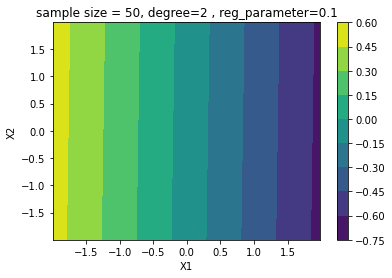

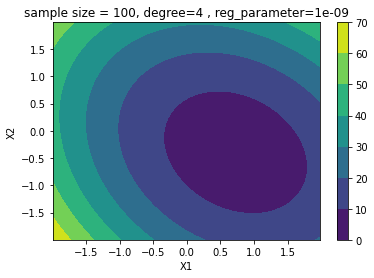

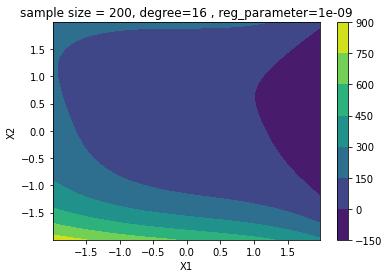

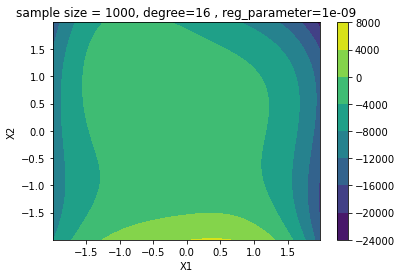

In [9]:
# Cell type : CodeWrite 
from matplotlib.colors import ListedColormap
regdata=load(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/PRML/A1/Data/dataset4_1.npz")
X_train_main=np.array(regdata[regdata.files[0]])
Y_train_main=np.array(regdata[regdata.files[1]])
X_test_main=np.array(regdata[regdata.files[2]])
Y_test_main=np.array(regdata[regdata.files[3]])


def compute_BV_error_sample_plot2(degree, reg_param, num_training_samples=50):
    wt_vector=polynomial_regression_ridge_train(X_train_main[:num_training_samples], Y_train_main[:num_training_samples], degree, reg_param)
    train_pred=polynomial_regression_ridge_pred(X_train_main[:num_training_samples], wt_vector, degree)
    test_pred=polynomial_regression_ridge_pred(X_test_main, wt_vector, degree)
    train_error=np.mean((train_pred-Y_train_main[:num_training_samples])**2)
    test_error=np.mean((test_pred-Y_test_main)**2)
    return train_error, test_error


degrees=np.array([1,2,4,8,16])
lambdas=np.array([1e-9,1e-7, 1e-5, 1e-3, 1e-1, 1e1])
for sample_size in [50,100,200,1000]:
    test_error_table=np.zeros((5,6))
    train_error_table=np.zeros((5,6))
    for i,degree in enumerate(degrees):
        for j,reg_param in enumerate(lambdas):
            train_error_table[i][j],test_error_table[i][j]= np.round(compute_BV_error_sample_plot2(degree, reg_param, sample_size),decimals=6)
    best_index=np.where(test_error_table==np.min(test_error_table)) 
    #print(best_index)
    deg=best_index[0][0]
    param=best_index[1][0]
    #print(test_error_table)
    
    
    X_set, y_set = X_test_main, Y_test_main
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    
    x_in = np.c_[X1.ravel(), X2.ravel()]
    wt_vector=polynomial_regression_ridge_train(X_train_main[:sample_size], Y_train_main[:sample_size], deg, param)
    y_pred_a = polynomial_regression_ridge_pred(x_in, wt_vector, deg).reshape(X1.shape)
    plt.contourf(X1, X2, y_pred_a)
    plt.xlim(X1.min(), X1.max())
    plt.colorbar()
    plt.title(f'sample size = {sample_size}, degree={degrees[deg]} , reg_parameter={lambdas[param]}')
    plt.ylim(X2.min(), X2.max())
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    #print((degrees[deg], lambdas[param]))
    

regdata.close()

** Cell type : TextWrite **
####  <center><font color='red'> Summary </font>  </center>

As seen with the contour plots, withlarge values of data, the model seems to improve, but there is a limit. For very large numbers in the dataset, the model seems to overfit the function, as visible in the last contour plot.


** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










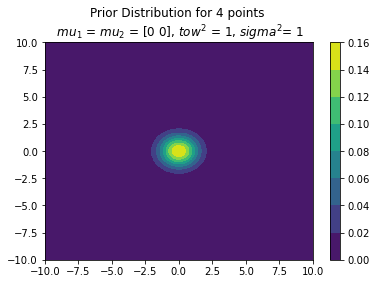

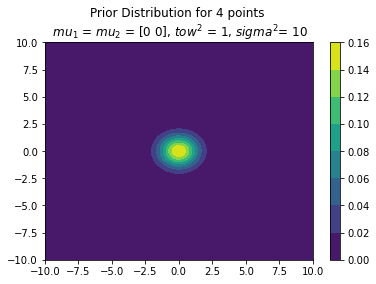

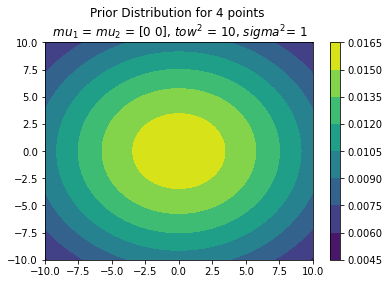

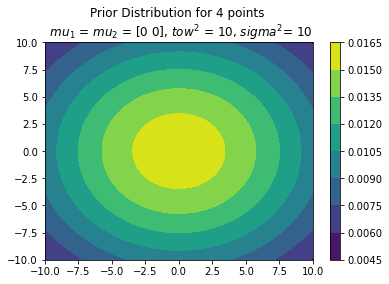

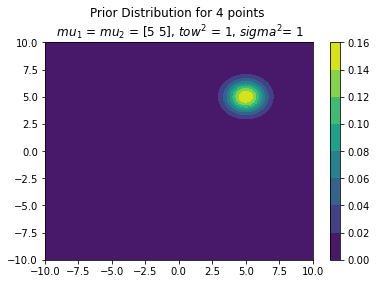

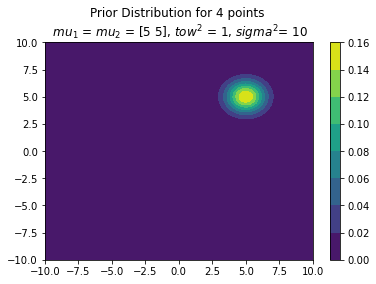

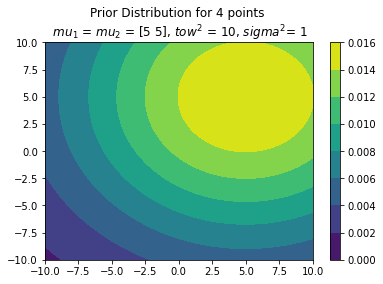

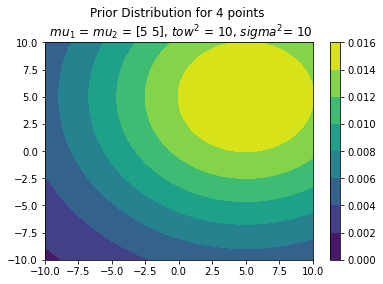

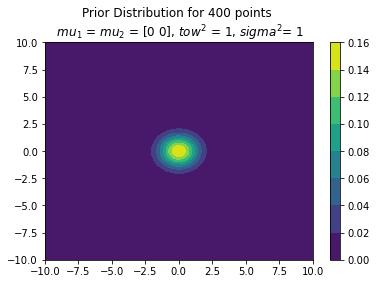

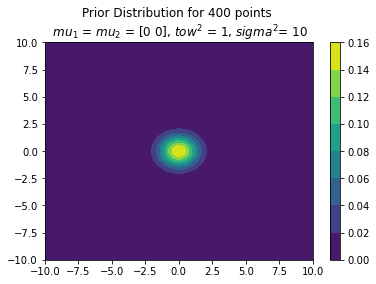

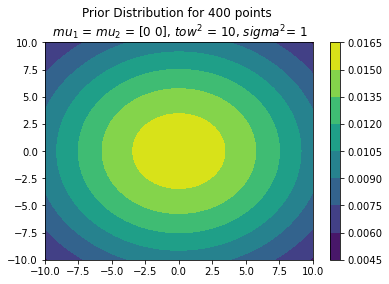

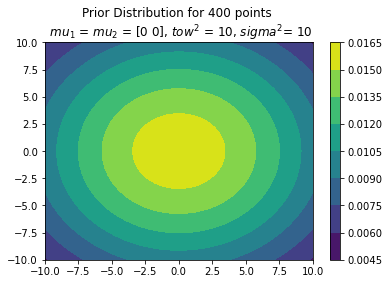

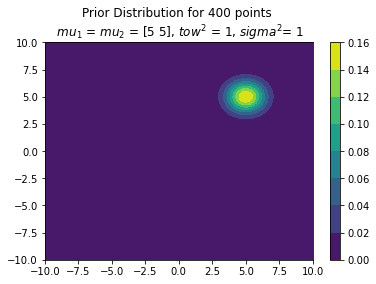

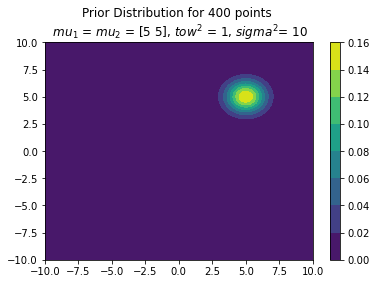

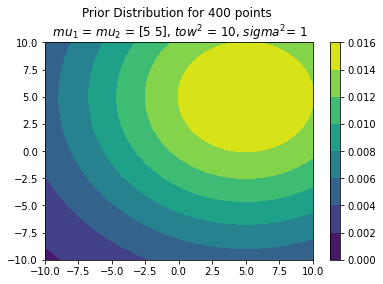

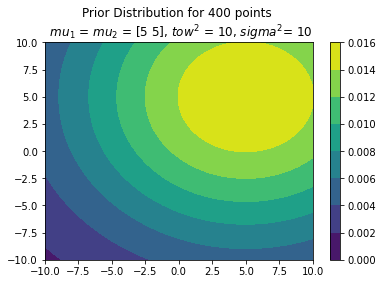

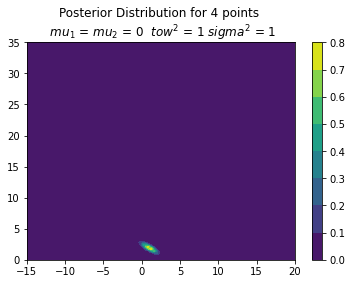

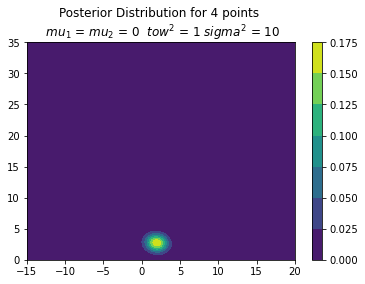

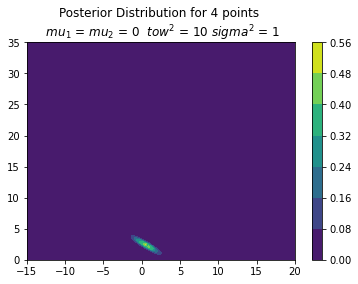

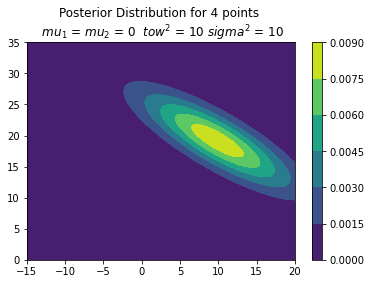

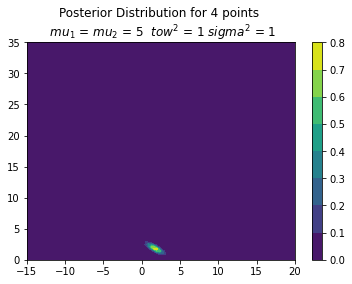

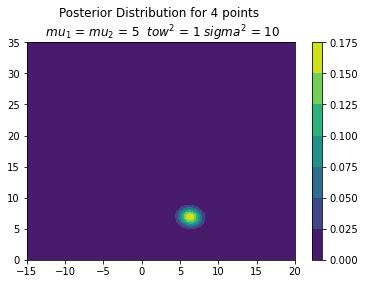

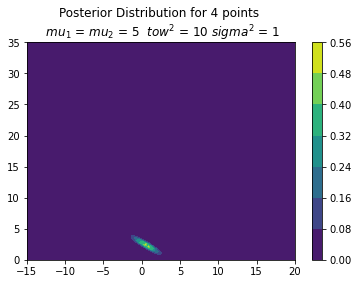

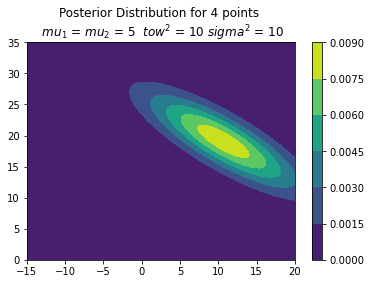

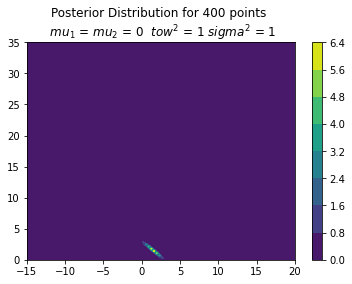

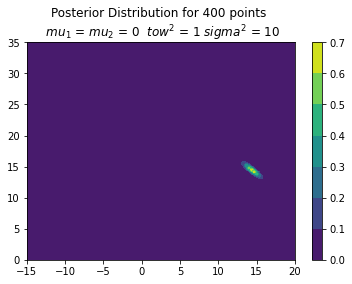

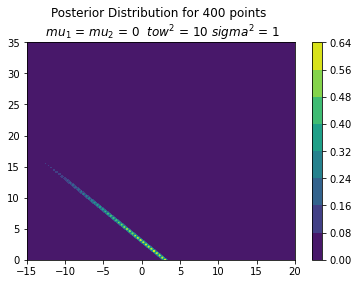

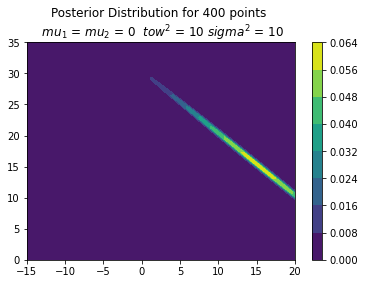

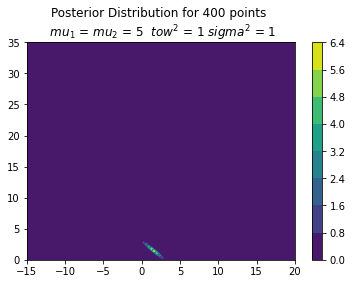

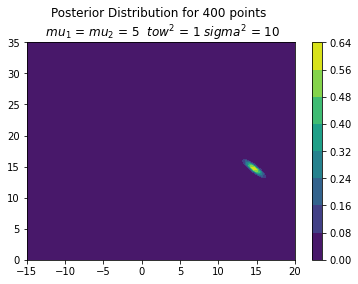

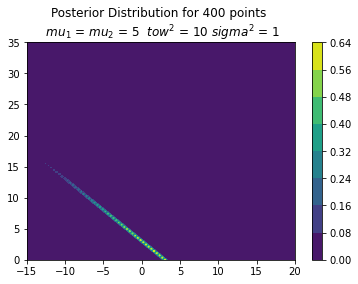

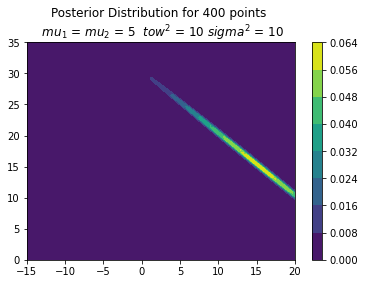

In [10]:
# Cell type : CodeWrite 
def prior_w(mu, tow, X):
    return (2*math.pi*tow)**(-1)*np.exp(-0.5*(np.sum(np.multiply(np.matmul(X - mu, np.linalg.inv(tow**2*np.identity(2))), X - mu), axis=1)))

means=[np.array([0,0]),np.array([5,5])]
for mu in means:
    for tow in [1,10]:
        for sigma in [1,10]:
            x1,x2 = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
            X = np.c_[x1.ravel(), x2.ravel()]
            Z = prior_w(mu, tow, X)
            Z = np.reshape(Z, x1.shape)
            plt.contourf(x1,x2,Z)
            plt.colorbar()
            plt.title('Prior Distribution for 4 points \n' + ' $mu_1$ = $mu_2$ = '+ str(mu) +', $tow^2$ = ' + str(tow) + ', $sigma^2$= ' + str(sigma))
            plt.show()
            
for mu in means:
    for tow in [1,10]:
        for sigma in [1,10]:
            x1,x2 = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
            X = np.c_[x1.ravel(), x2.ravel()]
            Z = prior_w(mu, tow, X)
            Z = np.reshape(Z, x1.shape)
            plt.contourf(x1,x2,Z)
            plt.colorbar()
            plt.title('Prior Distribution for 400 points \n' + ' $mu_1$ = $mu_2$ = '+ str(mu) +', $tow^2$ = ' + str(tow) + ', $sigma^2$= ' + str(sigma))
            plt.show()
            
def post_w(mu, tow, sig_s, X):
    x = np.array([[1,2],[2,2.1],[0.6,1.5],[1.1,0.9]])
    y = np.array([5.1, 6.1, 4.2, 2.9])
    cov = np.linalg.inv(((tow**2)**(-1))*(np.identity(2)) + (1/sig_s**2)*(np.matmul(x.T, x)))
    mean = np.matmul(cov, (1/tow**2)*mu + (1/sig_s)*(np.matmul(x.T, y)))
    return (2*math.pi*(np.linalg.det(cov))**(0.5))**(-1)*np.exp(-0.5*(np.sum(np.multiply(np.matmul(X - mean, np.linalg.inv(cov)), X - mean), axis=1)))
   
for mu in means:
    for tow in [1,10]:
        for sigma in [1,10]:
            x1,x2 = np.meshgrid(np.linspace(-15,20,100), np.linspace(0,35,100))
            X = np.c_[x1.ravel(), x2.ravel()]
            Z = post_w(mu, tow, sigma, X)
            Z = np.reshape(Z,x1.shape)
            plt.contourf(x1,x2,Z)
            plt.colorbar()
            plt.title('Posterior Distribution for 4 points \n' + ' $mu_1$ = $mu_2$ = '+ str(mu[0]) +'  $tow^2$ = ' + str(tow) + ' $sigma^2$ = ' + str(sigma))
            plt.show()

def post_w2(mu, tow, sig_s, X):
    x = np.repeat(np.array([[1,2],[2,2.1],[0.6,1.5],[1.1,0.9]]),100).reshape(400,2)
    y = np.repeat(np.array([5.1, 6.1, 4.2, 2.9]),100)
    cov = np.linalg.inv(((tow**2)**(-1))*(np.identity(2)) + (1/sig_s**2)*(np.matmul(x.T, x)))
    mean = np.matmul(cov, (1/tow**2)*mu + (1/sig_s)*(np.matmul(x.T, y)))
    return (2*math.pi*(np.linalg.det(cov))**(0.5))**(-1)*np.exp(-0.5*(np.sum(np.multiply(np.matmul(X - mean, np.linalg.inv(cov)), X - mean), axis=1)))
             

for mu in means:
    for tow in [1,10]:
        for sigma in [1,10]:
            x1,x2 = np.meshgrid(np.linspace(-15,20,100), np.linspace(0,35,100))
            X = np.c_[x1.ravel(), x2.ravel()]
            Z = post_w2(mu, tow, sigma, X)
            Z = np.reshape(Z,x1.shape)
            plt.contourf(x1,x2,Z)
            plt.colorbar()
            plt.title('Posterior Distribution for 400 points \n' + ' $mu_1$ = $mu_2$ = '+ str(mu[0]) +'  $tow^2$ = ' + str(tow) + ' $sigma^2$ = ' + str(sigma))
            plt.show()

** Cell type : TextWrite **
####  <center><font color='red'> Summary </font>  </center>

From the plots given above, we can see that when the number of points increases drastically, the estimation is more concentrated. This means that we are also getting a more optimized value of our weights. 
